In [59]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MultiLabelBinarizer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
from tqdm import tqdm
import re
import json
from collections import Counter
from collections import defaultdict


from catboost import CatBoostRegressor, Pool


In [60]:
def safe_literal_eval(x):
    if isinstance(x, list):
        return x 
    elif isinstance(x, str):
        try:
            return literal_eval(x)
        except:
            return np.nan
    else:
        return np.nan

In [61]:
# результат мапинга скилов через LLM часть 1 версия 5
#df_map_skills2_1 = pd.read_csv('temp_1_stage_5_df_train_result_skills_mapping_V5.csv')

# результат мапинга скилов через LLM часть 2 версия 5
#df_map_skills2_2 = pd.read_csv('stage_5_df_train_result_skills_mapping_V5.csv')

#df_map_skills2 = pd.concat([df_map_skills2_1, df_map_skills2_2], ignore_index=True)


In [62]:
# --- объединяем --- 2 версии мапинга
#df_map_skills = merge_df_map_skills(df_map_skills6_1, df_map_skills6_2, positions_v1, positions_v2)

In [63]:
#df_map_skills.to_csv('stage_5_df_train_result_skills_mapping_V6_full.csv', index = False)

In [64]:
#df_map_skills2.to_csv('stage_5_df_train_result_skills_mapping_V5_full.csv', index = False)

#### Старт последней версии пайплайна

In [65]:

'''def choose_min_clusters(n_skills, min_clusters=20):
    if n_skills < 70:
        n = n_skills
    elif n_skills < 100:
        n = math.ceil(n_skills * 0.35)
    elif n_skills < 200:
        n = math.ceil(n_skills * 0.20)
    elif n_skills < 400:    
        n = math.ceil(n_skills * 0.17)
    elif n_skills < 1200:
        n = math.ceil(n_skills * 0.15)
    else:
        n = math.ceil(n_skills * 0.12)
    return max(min_clusters, n)'''

'def choose_min_clusters(n_skills, min_clusters=20):\n    if n_skills < 70:\n        n = n_skills\n    elif n_skills < 100:\n        n = math.ceil(n_skills * 0.35)\n    elif n_skills < 200:\n        n = math.ceil(n_skills * 0.20)\n    elif n_skills < 400:    \n        n = math.ceil(n_skills * 0.17)\n    elif n_skills < 1200:\n        n = math.ceil(n_skills * 0.15)\n    else:\n        n = math.ceil(n_skills * 0.12)\n    return max(min_clusters, n)'

In [66]:

# результат объединения подготовленных данных с tg, web и hh.ru
df_train_result = pd.read_csv('data/stage_5_df_train_result.csv')

# результат мапинга скилов через LLM версия 6
df_map_skills6 = pd.read_csv('stage_5_df_train_result_skills_mapping_V6_full.csv')
# результат мапинга скилов через LLM версия 5
df_map_skills5 = pd.read_csv('stage_5_df_train_result_skills_mapping_V5_full.csv')



# результат мапинга скилов через LLM версия 4

df_map_skills4 = pd.read_csv('data/stage_5_df_train_result_skills_mapping_V4.csv')

# --- задаём списки ---
positions_v1 = [ # мапинг 4
     
    "Продуктовый аналитик",
        
    
]

positions_v2 = [ # мапинг 5
    
    #"Аналитик",
    #"Тестировщик",
    #"Системный аналитик",
    
    "Арт-директор, креативный директор",
    "Системный инженер",
    "Сетевой инженер",
    
    
    
    
    
]
    
positions_v3 = [ # мапинг 6
    "Аналитик",
    "Тестировщик",
    "Системный аналитик",
    
    "Руководитель группы разработки",
    
    "Дата-сайентист",
    "BI-аналитик, аналитик данных",
    "Бизнес-аналитик",
    "Руководитель проектов",
    "Программист, разработчик",
    "Директор по информационным технологиям (CIO)",
    "DevOps-инженер",
    "Дизайнер, художник",
    "Менеджер продукта",
    "Методолог",
    "Руководитель отдела аналитики",
    "Технический директор (CTO)",
    "Системный администратор",
    "Специалист по информационной безопасности",
    "Специалист технической поддержки",
    "Технический писатель"
        
    ]

def merge_df_map_skills(df1, df2, df3, positions_v1, positions_v2, positions_v3):
    """
    Объединяет два датафрейма с мапингами (V4, V5, V6) по заданным спискам позиций.

    :param df1: DataFrame из stage_5_df_train_result_skills_mapping_V4.csv
    :param df2: DataFrame из stage_5_df_train_result_skills_mapping_V5_full.csv
    :param df3: DataFrame из stage_5_df_train_result_skills_mapping_V6_full.csv
csv
    :param positions_v1: список позиций, для которых берём строки из df1
    :param positions_v2: список позиций, для которых берём строки из df2
    :param positions_v2: список позиций, для которых берём строки из df3
    :return: объединённый DataFrame df_map_skills
    """
    # фильтруем по спискам
    df_v1 = df1[df1['position'].isin(positions_v1)]
    df_v2 = df2[df2['position'].isin(positions_v2)]
    df_v3 = df3[df3['position'].isin(positions_v3)]
    # объединяем
    df_result = pd.concat([df_v1, df_v2, df_v3], ignore_index=True)

    return df_result
# --- объединяем --- 3 версии мапинга
df_map_skills = merge_df_map_skills(df_map_skills4, df_map_skills5, df_map_skills6 , positions_v1, positions_v2, positions_v3)
#df_map_skills = df_map_skills6

In [67]:
df_map_skills['position']

0                             Продуктовый аналитик
1                Арт-директор, креативный директор
2                                  Сетевой инженер
3                                Системный инженер
4                     BI-аналитик, аналитик данных
5                                         Аналитик
6                                  Бизнес-аналитик
7                                   Дата-сайентист
8                               Дизайнер, художник
9     Директор по информационным технологиям (CIO)
10                               Менеджер продукта
11                                       Методолог
12                  Руководитель группы разработки
13                   Руководитель отдела аналитики
14                           Руководитель проектов
15                         Системный администратор
16                              Системный аналитик
17       Специалист по информационной безопасности
18                Специалист технической поддержки
19                             

In [68]:
# Преобразуем JSON строки обратно в словари
df_map_skills['mapping_dict'] = df_map_skills['mapping'].apply(json.loads)
df_map_skills['anchors_list'] = df_map_skills['anchors'].apply(json.loads)

In [69]:
def process_anchors(anchors_list):
    """
    Обрабатывает список анкеров:
    1. Удаляет 'Other' если он есть
    2. Обрабатывает анкеры-списки: 
       - если список из 1 элемента - раскрывает его
       - если список из нескольких элементов - удаляет анкер
    3. Убеждается, что внутри нет 'Other'
    """
    processed_anchors = {}
    
    for anchor in anchors_list:
        # Пропускаем 'Other'
        if anchor == 'Other':
            continue
            
        # Если анкер - список
        if isinstance(anchor, list):
            # Удаляем анкеры-списки с несколькими элементами
            if len(anchor) > 1:
                continue
            # Раскрываем списки с одним элементом
            elif len(anchor) == 1:
                single_anchor = anchor[0]
                # Проверяем, что единственный элемент не 'Other'
                if single_anchor != 'Other':
                    processed_anchors[single_anchor] = []
        # Если анкер - строка (обычный случай)
        elif isinstance(anchor, str) and anchor != 'Other':
            processed_anchors[anchor] = []
    
    return processed_anchors

def resolve_mapping_with_anchors(mapping_dict, anchors_dict):
    """
    Обрабатывает mapping_dict с учетом обработанных анкеров
    Удаляет маппинги, которые ссылаются на удаленные анкеры-списки
    """
    processed_mapping = {}
    
    for skill, anchor in mapping_dict.items():
        # Если анкер - список
        if isinstance(anchor, list):
            # Удаляем маппинги к спискам с несколькими элементами
            if len(anchor) > 1:
                continue
            # Раскрываем списки с одним элементом
            elif len(anchor) == 1:
                single_anchor = anchor[0]
                # Проверяем, что анкер существует после обработки
                if single_anchor in anchors_dict:
                    processed_mapping[skill] = single_anchor
        # Если анкер - строка
        elif isinstance(anchor, str):
            # Проверяем, что анкер существует после обработки
            if anchor in anchors_dict:
                processed_mapping[skill] = anchor
    
    return processed_mapping



In [70]:

position_mapping = {}
for _, row in df_map_skills.iterrows():
    position_mapping[row['position']] = row['mapping_dict']

In [71]:
'''# список файлов и соответствующих позиций
replacement_files = {
    "Дата-сайентист": "data/datascientist_mapping.json",
    #"BI-аналитик, аналитик данных": "data/bi_mapping.json",
}

# заменяем в словаре
for position, filepath in replacement_files.items():
    try:
        with open(filepath, "r", encoding="utf-8") as f:
            mapping_from_file = json.load(f)
        position_mapping[position] = mapping_from_file
        print(f"✅ Заменён mapping для позиции '{position}' из файла {filepath}")
    except FileNotFoundError:
        print(f"⚠️ Файл {filepath} не найден — пропуск")
    except json.JSONDecodeError as e:
        print(f"⚠️ Ошибка чтения JSON в {filepath}: {e}")'''


'# список файлов и соответствующих позиций\nreplacement_files = {\n    "Дата-сайентист": "data/datascientist_mapping.json",\n    #"BI-аналитик, аналитик данных": "data/bi_mapping.json",\n}\n\n# заменяем в словаре\nfor position, filepath in replacement_files.items():\n    try:\n        with open(filepath, "r", encoding="utf-8") as f:\n            mapping_from_file = json.load(f)\n        position_mapping[position] = mapping_from_file\n        print(f"✅ Заменён mapping для позиции \'{position}\' из файла {filepath}")\n    except FileNotFoundError:\n        print(f"⚠️ Файл {filepath} не найден — пропуск")\n    except json.JSONDecodeError as e:\n        print(f"⚠️ Ошибка чтения JSON в {filepath}: {e}")'

In [72]:
def remove_list_anchors(position_mapping):
    """
    Обрабатывает якоря, которые оказались списками (list), в position_mapping
    Если список содержит 1 элемент - раскрывает скобки, если больше - удаляет.

    Parameters:
    position_mapping (dict): словарь маппинга вида
                             {position: {anchor: target, ...}}

    Returns:
    dict: обработанный словарь
    """
    cleaned_mapping = {}

    for position, anchors in position_mapping.items():
        new_anchors = {}
        for anchor, target in anchors.items():
            if isinstance(target, list):
                if len(target) == 1:
                    # Раскрываем список из 1 элемента в строку
                    new_anchors[anchor] = target[0]
                    print(f"⚠️ Раскрыт список из 1 элемента в позиции '{position}': {target} -> '{target[0]}'")
                else:
                    # Удаляем список из нескольких элементов
                    print(f"⚠️ Удалён якорь-список в позиции '{position}': {target}")
                    continue
            else:
                new_anchors[anchor] = target

        cleaned_mapping[position] = new_anchors

    return cleaned_mapping

In [73]:
position_mapping = remove_list_anchors(position_mapping)

In [74]:
from collections import defaultdict, Counter

def refine_position_mapping(position_mapping):
    """
    Дополнительная обработка position_mapping по правилам:
    1. Убираем связки skill -> Other, если этот же skill имеет другой анкер
    2. Если есть цепочка skill -> anchor и другой skill -> anchor == skill,
       схлопываем в сторону наиболее частотного "ядра".
    """

    refined_mapping = {}

    for position, mapping in position_mapping.items():
        # --- 1. Убираем skill -> Other если у скилла есть другой анкер ---
        # Построим обратный индекс: skill -> [anchors]
        reverse_index = defaultdict(list)
        for skill, anchor in mapping.items():
            reverse_index[skill].append(anchor)

        cleaned_mapping = {}
        for skill, anchor in mapping.items():
            if anchor == "Other" and len(reverse_index[skill]) > 1:
                # У этого скилла есть другой анкер, пропускаем "Other"
                continue
            cleaned_mapping[skill] = anchor

        # --- 2. Схлопывание вложенных анкерных связей ---
        # Построим счетчик сколько раз каждый анкер встречается
        anchor_counts = Counter(cleaned_mapping.values())

        # Функция для нахождения финального "ядра" (самого частотного)
        def find_core_anchor(anchor):
            visited = set()
            while anchor in cleaned_mapping and anchor in cleaned_mapping.keys():
                # anchor сам является skill, значит у него есть маппинг
                next_anchor = cleaned_mapping[anchor]
                if next_anchor == anchor or next_anchor in visited:
                    break
                visited.add(anchor)
                anchor = next_anchor
            return anchor

        merged_mapping = {}
        for skill, anchor in cleaned_mapping.items():
            core_anchor = find_core_anchor(anchor)
            merged_mapping[skill] = core_anchor

        refined_mapping[position] = merged_mapping

    return refined_mapping

In [75]:
position_mapping = refine_position_mapping(position_mapping)

In [76]:
def map_skills_to_categories(skills_list, mapping_dict):
    """
    Преобразует список навыков в категории используя словарь маппинга
    """
    if not isinstance(skills_list, list):
        return []
    
    mapped_categories = []
    for skill in skills_list:
        # Ищем точное соответствие
        if skill in mapping_dict:
            mapped_categories.append(mapping_dict[skill])
        else:
            # Попробуем найти неточное соответствие
            found = False
            for original_skill, category in mapping_dict.items():
                if skill.lower() == original_skill.lower():
                    mapped_categories.append(category)
                    found = True
                    break
            if not found:
                mapped_categories.append("Other")
    
    return mapped_categories

def aggregate_categories(mapped_categories):
    """
    Агрегирует категории: убирает дубликаты и сортирует
    """
    if not mapped_categories:
        return []
    
    # Считаем частоты
    counter = Counter(mapped_categories)
    
    # Убираем "Other" если есть другие категории
    if "Other" in counter and len(counter) > 1:
        del counter["Other"]
    
    # Возвращаем отсортированный список уникальных категорий
    return [cat for cat, _ in counter.most_common()]

In [77]:
# Применяем маппинг к каждой строке
def apply_skills_mapping(row):
    position = row['position']
    skills_list = safe_literal_eval(row['skills']) if isinstance(row['skills'], str) else row['skills']
    
    if position in position_mapping:
        mapping_dict = position_mapping[position]
        # Маппим каждый навык к категории
        mapped_categories = map_skills_to_categories(skills_list, mapping_dict)
        # Агрегируем результат
        final_categories = aggregate_categories(mapped_categories)
        return final_categories
    else:
        # Если для позиции нет маппинга, возвращаем оригинальные навыки
        return skills_list

# Применяем функцию к DataFrame
print("Начинаем применять маппинг навыков...")
df_train_result['mapped_skills'] = df_train_result.apply(apply_skills_mapping, axis=1)

Начинаем применять маппинг навыков...


In [78]:
# Подсчет уникальных навыков
all_skills = []
for skills_list in df_train_result['mapped_skills']:
    all_skills.extend(skills_list)

skills_frequency = Counter(all_skills)
unique_skills_count = len(skills_frequency)
unique_skills_count

7684

In [146]:
def analyze_other_mapping_v2(row):
    position = row['position']
    skills_list = safe_literal_eval(row['skills']) if isinstance(row['skills'], str) else row['skills']
    
    if position == 'Специалист технической поддержки':
        if position in position_mapping:
            mapping_dict = position_mapping[position]
            # Маппим все навыки
            mapped_categories = map_skills_to_categories(skills_list, mapping_dict)
            
            # Находим навыки с категорией 'anchor/Other'
            other_skills = []
            for skill, category in zip(skills_list, mapped_categories):
                if category == 'anchor/Other':
                    other_skills.append(skill)
            
            return other_skills if other_skills else None
    
    return None

# Применяем альтернативную функцию
print("Анализируем навыки, которые мапятся в 'anchor/Other'...")
df_train_result['other_mapped_skills'] = df_train_result.apply(analyze_other_mapping_v2, axis=1)

# Фильтруем и выводим результаты
other_skills_results = df_train_result[df_train_result['other_mapped_skills'].notna()]['other_mapped_skills']
all_other_skills = []

for skills_list in other_skills_results:
    if skills_list:
        all_other_skills.extend(skills_list)

# Получаем уникальные навыки
unique_other_skills = list(set(all_other_skills))

print(f"Навыки, мапящиеся в 'anchor/Other' для специалистов техподдержки:")
for i, skill in enumerate(sorted(unique_other_skills), 1):
    print(f"{i}. {skill}")

print(f"\nВсего уникальных навыков в категории 'Other': {len(unique_other_skills)}")

Анализируем навыки, которые мапятся в 'anchor/Other'...
Навыки, мапящиеся в 'anchor/Other' для специалистов техподдержки:
1. 2д сканеры
2. ABBYY FineReader
3. Apache Tomcat
4. Atlassian ABBM
5. C#
6. Cookies
7. ELMA 3
8. IIS
9. IP-адресация
10. IPMA
11. IT-менеджмент
12. IT-сфера
13. ITIL/COBIT
14. Ivanti Service Manager
15. MicroStation
16. Neoflex
17. Paint.net
18. SKYPE FOR BISNESS
19. Sessions
20. Sockets
21. VsDesk
22. WAY4
23. WEB-серверы Apache, IIS
24. Автоматизация задач администрирования
25. Автоматизированные системы обработки обращений
26. Администрирование WS Exchange Server
27. Акт выполненных работ
28. Антивирусные программы и средства защиты информации
29. Архитектура ЛВС
30. Архитектура веб приложений
31. Базовое понимание юридических процессов
32. Бухгалтерский/управленческий учет
33. Вежливость, коммуникабельность
34. Взаимодействие с провайдерами связи
35. Выполнение действий в соответствии с регламентами и инструкциями
36. ГРАНД-Смета
37. Горячая линия
38. Готовнос

In [79]:
from collections import OrderedDict

skill_mapping = {
    "Дизайнер, художник": {
        "PHOTOSHOP": "Adobe Photoshop",
        "MS Office Word, Excel, Power Point, Outlook": "Microsoft Office Word, Excel",
        "знание программы CorelDRAW":"CorelDRAW",
        "COREL":"CorelDRAW",
        "Adobe Creative Suite Photoshop, Illustrator, InDesign, After Effects": "Adobe Creative Suite",
        "Adobe Creative Cloud: Photoshop, Illustrator, InDesign, After Effects, Power Point": "Adobe Creative Cloud",
        "2д анимация в Adobe After Effects":"2D анимация Adobe After Effects",
        "Adobe": "Adobe Creative Suite",
        "3d": "3D визуализация"
    },
    "Аналитик": {
        "Знание предметной области бухгалтерский и налоговый учет": "Бухгалтерский, оперативный и фин. учет",
        "1С:Управление торговлей":"1С:УТ",
        "MS Word": "MS Office",
        "MS Outlook": "MS Office"
    },
    "Руководитель проектов":{
        "1С системы продажи, закупки, производство, выполнение работ": "1C",
        "MS Office Word": "MS Office",
        "MS Office Outlook": "MS Office",
        "MS Office Excel": "MS Office"
    },
    "Менеджер продукта": {
        "Google Analytics": "GA"
    },
    "Методолог": {
        "уверенный пользователь ПК MS Office, Outlook, уверенное владение Excel": "Уверенный пользователь ПК (MS Office, Outlook Excel)",
        "опыт работы в учетных бухгалтерских системах SAP, 1C и других": "Опыт работы в Бух системах SAP, 1C и др"
    },
    "Программист, разработчик": {
        "1С: Бухгалтерия 3": "1С",
        "1c8": "1С"
    },
    "Продуктовый аналитик": {
        "Excel/Google Sheets": "Google Sheets"
    },
    "Системный администратор": {
        "Windows Server": "Microsoft Windows Server",
        "Windows": "Microsoft Windows",
        "Microsoft Office": "MS Office",
        "Active Directory": "MS ActiveDirectory",
        "Администрирование серверного оборудования под управлением ОС MS Windows Server 2008-2016 и OС Linux": "Microsoft Windows Server/Linux",
        "MS Office Word": "MS Office"
        
    },
    "Специалист по информационной безопасности": {
        "Windows/Linux": "Linux/Windows",
        "Windows Server": "Microsoft Windows Server"
    },
    "Специалист технической поддержки": {
        "работа в офисных программах и CRM": "Работа в офисных программах и CRM",
        "anchor/Other": "Other",
        "Service/Help Desk": "HelpDesk/ServiceDesk",
        "MS Office Word": "MS Office",
        "Консультирование клиентов по продуктам \"1С": "Консультирование клиентов по продуктам 1С"
    },
    "Сетевой инженер":{
        "стека протоколов TCP/IP": "Стек протоколов TCP/IP",
        "Сетевая модель OSI и модель TCP/IP":"OSI / TCP/IP",
        "сетевые протоколы и технологии L2/L3": "Cетевые протоколы и технологии L2/L3",
        "мониторинг работы сетевых устройств Eltex, Cisco": "Мониторинг работы сетевых устройств Eltex, Cisco",
        "Сетевое оборудование коммутаторы, маршрутизаторы": "Настройка и поддержка сетевого оборудования d-link, mikrotik, cisco, juniper"
    },
    "Технический писатель":{
        "Microsoft Outlook": "MS Office"
    }
}



def apply_position_mapping(row, mapping):
    position = row['position']
    skills = row['mapped_skills']

    if not isinstance(skills, list):
        return skills  # на всякий случай защита от кривых данных

    if position in mapping:
        mapped = [mapping[position].get(skill, skill) for skill in skills]
        # убираем дубликаты, но сохраняем порядок
        mapped = list(OrderedDict.fromkeys(mapped))
        return mapped
    
    return skills


df_train_result['mapped_skills'] = df_train_result.apply(
    lambda row: apply_position_mapping(row, skill_mapping),
    axis=1
)


In [80]:




# 5. Топ-20 самых популярных навыков в разрезе каждой позиции
print("\n" + "="*60)
print("ТОП-30 САМЫХ ПОПУЛЯРНЫХ НАВЫКОВ ПО ПОЗИЦИЯМ")
print("="*60)

# Создаем словарь для подсчета навыков по позициям
position_skills_frequency = {}

for position in df_train_result['position'].unique():
    # Фильтруем данные по текущей позиции
    position_data = df_train_result[df_train_result['position'] == position]
    
    # Собираем все навыки для этой позиции (распаковываем списки)
    position_all_skills = []
    for skills_list in position_data['mapped_skills']:
        position_all_skills.extend(skills_list)
    
    # Подсчитываем частоту навыков для этой позиции
    pos_skills_counter = Counter(position_all_skills)
    
    # Сохраняем результат
    position_skills_frequency[position] = pos_skills_counter
    
    # Создаем DataFrame для топ-20 навыков этой позиции
    top_skills_pos = pd.DataFrame.from_dict(pos_skills_counter, orient='index', columns=['Количество'])
    top_skills_pos = top_skills_pos.sort_values('Количество', ascending=False).head(40)
    
    print(f"\n--- {position} ---")
    print(f"Всего уникальных навыков: {len(pos_skills_counter)}")
    print(f"Топ-40 навыков:")
    display(top_skills_pos)
    top_skills_pos.to_excel(f'data/skill_clust_6_5_4_ver3/top_40_prod_{position}.xlsx')



ТОП-30 САМЫХ ПОПУЛЯРНЫХ НАВЫКОВ ПО ПОЗИЦИЯМ

--- BI-аналитик, аналитик данных ---
Всего уникальных навыков: 178
Топ-40 навыков:


,Количество
SQL,229
Excel,162
Python,139
Power BI,98
BI системы,41
1С,35
Apache AirFlow,32
MS Office,32
ETL,31
OLAP,26



--- DevOps-инженер ---
Всего уникальных навыков: 81
Топ-40 навыков:


,Количество
Linux,656
Docker,650
Kubernetes,647
Ansible/Terraform,593
Zabbix/Prometheus/Grafana,512
GitLab CI/CD/Jenkins,436
Bash/Python/Ansible,408
GitLab CI/CD,326
Git,325
PostgreSQL/MySQL,291



--- Аналитик ---
Всего уникальных навыков: 422
Топ-40 навыков:


,Количество
1С,335
MS Excel,279
1С:ERP,180
MS Office,164
SQL,148
1С:ЗУП,113
Other,112
BPMN,74
1С:УТ,68
1С:Бухгалтерия,60



--- Арт-директор, креативный директор ---
Всего уникальных навыков: 301
Топ-40 навыков:


,Количество
Adobe Suite,17
FIGMA,13
Microsoft PowerPoint,8
AI-инструменты,6
Организация мероприятий,6
Подготовка отчетности,5
Управление командой,5
Работа в команде,5
Креативность,5
Грамотная устная речь,5



--- Бизнес-аналитик ---
Всего уникальных навыков: 176
Топ-40 навыков:


,Количество
BPMN,166
MS Office,132
1С,94
SQL,80
UML,75
Power BI,44
CRM,44
Other,44
JIRA,41
REST API,37



--- Дата-сайентист ---
Всего уникальных навыков: 115
Топ-40 навыков:


,Количество
Python,132
SQL,73
Scikit-learn,72
PyTorch,48
TensorFlow,46
Apache Spark,43
Docker,40
Hugging Face Transformers,40
PostgreSQL,38
Pandas,37



--- Дизайнер, художник ---
Всего уникальных навыков: 428
Топ-40 навыков:


,Количество
Adobe Photoshop,513
Adobe Illustrator,429
FIGMA,388
CorelDRAW,358
Adobe Photoshop/Gimp,334
Adobe Creative Suite,282
Adobe Illustrator/Inkscape,176
Дизайн,103
Adobe After Effects,101
Autocad/ARCHICAD,83



--- Директор по информационным технологиям (CIO) ---
Всего уникальных навыков: 40
Топ-40 навыков:


,Количество
Other,22
1C,14
Active Directory,8
Linux,7
Bitrix24,6
Zabbix,5
Asterisk,4
PostgreSQL,4
VMware,4
MIKROTIK,3



--- Менеджер продукта ---
Всего уникальных навыков: 162
Топ-40 навыков:


,Количество
Other,194
MS Office,93
Project Management,72
1С,64
Excel,38
Agile,29
MS Project,21
SQL,20
A/B тестирование,19
GA,16



--- Методолог ---
Всего уникальных навыков: 385
Топ-40 навыков:


,Количество
1С,39
Microsoft Office,35
Интеграция битрикс24,16
"Уверенный пользователь ПК (MS Office, Outlook Excel)",15
HTML,13
PHP,11
JS,11
Git,11
CSS,10
Other,10



--- Программист, разработчик ---
Всего уникальных навыков: 1665
Топ-40 навыков:


,Количество
Git GitLab,1537
REST API,1518
JavaScript,1486
Docker/Docker-compose,1016
MySQL/PostgreSQL/MariaDB,988
PHP,936
Other,851
Python,797
SQL,759
CSS,715



--- Продуктовый аналитик ---
Всего уникальных навыков: 52
Топ-40 навыков:


,Количество
Other,31
Python,31
SQL,24
Excel,20
PostgreSQL,17
Google Analytics,8
ClickHouse,7
Google Sheets,7
Tableau,7
BI-системы,7



--- Руководитель группы разработки ---
Всего уникальных навыков: 331
Топ-40 навыков:


,Количество
PostgreSQL,75
Python,60
Docker,51
CI/CD,40
Git,40
Kafka,39
1С,38
Kubernetes,36
React,35
PHP,34



--- Руководитель отдела аналитики ---
Всего уникальных навыков: 44
Топ-40 навыков:


,Количество
MS EXCEL,19
SQL,17
1С,16
Python,12
Other,12
POWER BI,7
Deep Learning,4
PyTorch,4
ML,4
BI-инструменты,4



--- Руководитель проектов ---
Всего уникальных навыков: 248
Топ-40 навыков:


,Количество
Other,339
MS Office,300
1C,119
Agile,94
CRM Битрикс 24,72
Jira,47
CRM/ERP,37
Scrum,29
CMS Bitrix,28
Google Docs,28



--- Сетевой инженер ---
Всего уникальных навыков: 995
Топ-40 навыков:


,Количество
Linux Debian,67
Linux Debian/Linux CentOS,53
Cisco Catalyst,53
BGP,38
"Настройка и поддержка сетевого оборудования d-link, mikrotik, cisco, juniper",31
Протоколы и технологии,27
Стек протоколов TCP/IP,27
SIP телефонии,26
VLAN-транки,26
Huawei,26



--- Системный администратор ---
Всего уникальных навыков: 602
Топ-40 навыков:


,Количество
Microsoft Windows,834
Linux,702
MS ActiveDirectory,701
Microsoft Windows Server,508
MPLS,470
TCP/IP,447
1С,417
Mikrotik,410
VMware,322
MS Office,303



--- Системный аналитик ---
Всего уникальных навыков: 390
Топ-40 навыков:


,Количество
REST API,364
MS SQL Server,326
BPMN,310
JSON,134
PostgreSQL,106
Confluence,101
UML,97
SQL T-SQL,88
микросервисная архитектура,84
Scrum/Agile,69



--- Системный инженер ---
Всего уникальных навыков: 1332
Топ-40 навыков:


,Количество
WINDOWS,123
TCP/IP,73
Debian/CentOS/Red Hat,71
Service Desk,55
ZABBIX,44
Kubernetes,38
LINUX,37
Ansible/Python,37
SQL,36
DOCKER,35



--- Специалист по информационной безопасности ---
Всего уникальных навыков: 495
Топ-40 навыков:


,Количество
Other,278
MS Office,97
Linux,94
Windows,90
Firewall,85
Syslog,73
VipNet,63
Linux/Windows,62
SIEM,61
Kaspersky,52



--- Специалист технической поддержки ---
Всего уникальных навыков: 773
Топ-40 навыков:


,Количество
Работа в офисных программах и CRM,2627
Почтовые программы,686
MS Office,501
Опыт работы с торговым оборудованием,317
Linux,160
Other,115
MS SQL,109
Jira,107
HelpDesk/ServiceDesk,90
TCP/IP,81



--- Тестировщик ---
Всего уникальных навыков: 494
Топ-40 навыков:


,Количество
SQL,639
Selenium,544
REST API,535
JAVA,429
Git,426
Selenide,360
Jenkins,359
Python,356
JIRA,336
Postman,297



--- Технический директор (CTO) ---
Всего уникальных навыков: 18
Топ-40 навыков:


,Количество
Other,64
MS Office,18
Excel,15
1С,12
AutoCAD,9
Высшее техническое образование,4
CRM,2
Bitrix24,2
PHP,2
Grand MA2,1



--- Технический писатель ---
Всего уникальных навыков: 55
Топ-40 навыков:


,Количество
MS Office,75
Other,44
Compass,15
Git,12
AutoCAD,11
MS Visio,10
Confluence,10
SolidWorks,9
English,8
1С,7


In [81]:
mask = (
    (df_train_result['position'] == "Дизайнер, художник") &
    (df_train_result['mapped_skills'].apply(lambda skills: isinstance(skills, list) and "Продажи корпусной мебели" in skills))
)

# Выводим vacancy и skills
df_train_result.loc[mask, ['vacancy', 'mapped_skills']]

,vacancy,mapped_skills
2029,Дизайнер-менеджер в печатный салон,"[Использование ПК, Знание программ, Продажи ко..."
2086,Менеджер - дизайнер корпусной мебели,"[Продажи корпусной мебели, Уверенный пользоват..."
2113,Начинающий дизайнер-консультант мебельного салона,"[Дизайн интерьеров, Продажи корпусной мебели, ..."
2115,"Дизайнер-консультант мебельной студии в ТЦ ""Ку...","[Дизайн, Продажи корпусной мебели, Bitrix24, Г..."
2216,Дизайнер-менеджер,"[Продажи корпусной мебели, Оформление и сопров..."
2409,Менеджер-дизайнер,"[Работа с клиентами, Создание проектов, Продаж..."
2412,Дизайнер-консультант в ателье мебели Mr.Doors,"[Продажи корпусной мебели, Графические програм..."
2426,Дизайнер-консультант в интерьерно-выставочный ...,"[Продажи корпусной мебели, Графические програм..."
2427,Дизайнер - консультант,"[1с, 3D Моделирование, Дизайн интерьеров, Прод..."
2442,Дизайнер по шторам и текстилю,"[1С, Коммуникация, Продажи корпусной мебели, C..."


In [82]:
df_train_result = df_train_result[~mask].copy()

In [83]:
def flatten_skills(skills_series):
    all_skills = []
    for skill_list in skills_series:
        if isinstance(skill_list, list):
            all_skills.extend(skill_list)
    return all_skills

In [84]:
all_skills = flatten_skills(df_train_result['mapped_skills'])
unique_skills_count = len(set(all_skills))
display(unique_skills_count)

7666

In [85]:
df_train_result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22305 entries, 0 to 22342
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     22305 non-null  int64  
 1   salary from    22305 non-null  float64
 2   salary to      22305 non-null  float64
 3   position       22305 non-null  object 
 4   experience     21043 non-null  object 
 5   skills         22305 non-null  object 
 6   schedule       22167 non-null  object 
 7   employment     22085 non-null  object 
 8   vacancy        22305 non-null  object 
 9   level          22305 non-null  object 
 10  region         21988 non-null  object 
 11  mapped_skills  22305 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 2.2+ MB


In [86]:
# Список скилов 1С для маппинга
skills_to_map = [
    '1С:ERP', '1С:ЗУП', '1С:Бухгалтерия', '1С:УТ', '1С:ДО',
    '1С:БП', '1С:КА', '1С:УХ', '1С:УПП', '1С:Управление торговлей',
    '1С:ЗКГУ'
]

# Функция для маппинга скилов
def map_1c_skills(skills_list):
    if not isinstance(skills_list, list):
        return skills_list
    
    mapped_skills = []
    for skill in skills_list:
        if skill in skills_to_map:
            mapped_skills.append('1С')
        else:
            mapped_skills.append(skill)
    
    # Убираем дубликаты, если они появились после маппинга
    return list(dict.fromkeys(mapped_skills))

# Применяем маппинг только для аналитиков
analyst_mask = df_train_result['position'] == 'Аналитик'
#df_train_result.loc[analyst_mask, 'mapped_skills'] = df_train_result.loc[analyst_mask, 'mapped_skills'].apply(map_1c_skills)

In [87]:
# Уберем все что не получилоо мапинг и не в anchor_list

def filter_mapped_skills(row):
    """
    Обновляет mapped_skills:
    - категории вне anchors_list и вне маппинга заменяются на 'Other'
    - убираем дубликаты 'Other'
    - считаем количество замен в Other
    """
    position = row['position']
    anchors = row['anchors_list']
    mapped_skills = row['mapped_skills']

    # допустимые категории = anchors + значения маппинга
    allowed_categories = set(anchors)
    if position in position_mapping:
        allowed_categories.update(position_mapping[position].values())

    updated = []
    replaced_count = 0  # счётчик замен

    for skill in mapped_skills:
        if skill == "Other":
            updated.append("Other")
        elif skill in allowed_categories:
            updated.append(skill)
        else:
            updated.append("Other")
            replaced_count += 1

    # убираем дубли 'Other', оставляем только один
    result = []
    for skill in updated:
        if skill == "Other" and "Other" in result:
            continue
        result.append(skill)

    return pd.Series([result, replaced_count])



In [88]:
df_train_result = df_train_result.merge(
    df_map_skills[['position', 'anchors_list']],
    on='position',
    how='left'
)


# применяем
df_train_result[['mapped_skills_filtered', 'other_replaced_count']] = (
    df_train_result.apply(filter_mapped_skills, axis=1)
)



print("=== КОЛ-ВО ЗАМЕН В РАЗРЕЗЕ POSITION ===")
replace_counts = df_train_result.groupby("position")['other_replaced_count'].sum()
print(replace_counts)

print(f"\nВсего замен: {replace_counts.sum()}")
print(f"Всего строк обработано: {len(df_train_result)}")


=== КОЛ-ВО ЗАМЕН В РАЗРЕЗЕ POSITION ===
position
BI-аналитик, аналитик данных                       0
DevOps-инженер                                     0
Аналитик                                           0
Арт-директор, креативный директор                  0
Бизнес-аналитик                                    0
Дата-сайентист                                     0
Дизайнер, художник                               121
Директор по информационным технологиям (CIO)       0
Менеджер продукта                                  0
Методолог                                         19
Программист, разработчик                           0
Продуктовый аналитик                               0
Руководитель группы разработки                     0
Руководитель отдела аналитики                      0
Руководитель проектов                            119
Сетевой инженер                                   62
Системный администратор                            0
Системный аналитик                                

In [89]:
all_skills = flatten_skills(df_train_result['mapped_skills_filtered'])
unique_skills_count = len(set(all_skills))
display(unique_skills_count)

7656

In [90]:
df_train_result['mapped_skills'] = df_train_result['mapped_skills_filtered']

In [91]:
# Посмотрим на распределение скилолв по кол-ву на вакансию
import plotly.express as px

df_train_result['skills_count'] = df_train_result['mapped_skills'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# Считаем распределение
skills_dist = df_train_result['skills_count'].value_counts().sort_index().reset_index()
skills_dist.columns = ['Количество навыков', 'Число вакансий']

# Строим интерактивный график
fig = px.bar(
    skills_dist,
    x='Количество навыков',
    y='Число вакансий',
    title='Распределение количества навыков mapped_skills в вакансиях',
    labels={'Количество навыков': 'Число навыков в вакансии', 'Число вакансий': 'Количество вакансий'},
    text='Число вакансий',
    color='Количество навыков',
    color_continuous_scale='Viridis'
)

# Добавляем среднюю линию
mean_val = df_train_result['skills_count'].mean()
fig.add_shape(
    type="line",
    x0=mean_val, y0=0,
    x1=mean_val, y1=skills_dist['Число вакансий'].max(),
    line=dict(color="red", width=2, dash="dot")
)

fig.add_annotation(
    x=mean_val,
    y=skills_dist['Число вакансий'].max(),
    text=f"Среднее: {mean_val:.1f}",
    showarrow=True,
    arrowhead=1,
    ax=-40
)

# Настройки отображения
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(
    hovermode="x",
    xaxis=dict(tickmode='linear'),
    coloraxis_showscale=False
)

fig.show()

In [92]:

# Добавляем колонку с числом навыков mapped_skills_filtered
df_train_result['skills_count'] = df_train_result['mapped_skills_filtered'].apply(
    lambda x: len(x) if isinstance(x, list) else 0
)

# Считаем распределение в разрезе position
skills_dist_pos = (
    df_train_result.groupby(['position', 'skills_count'])
    .size()
    .reset_index(name='Число вакансий')
)

# Среднее и медианное число навыков на вакансию по каждой позиции
stats_skills_per_position = (
    df_train_result.groupby('position')['skills_count']
    .agg(['mean', 'median'])
    .reset_index()
    .rename(columns={'mean': 'avg_skills_count', 'median': 'median_skills_count'})
)

# Строим интерактивный график с разрезом по position
fig = px.bar(
    skills_dist_pos,
    x='skills_count',
    y='Число вакансий',
    color='skills_count',
    facet_col='position',  # отдельный график на каждую позицию
    facet_col_wrap=3,      # число графиков в ряд
    title='Распределение количества навыков mapped_skills по позициям',
    labels={'skills_count': 'Число навыков в вакансии', 'Число вакансий': 'Количество вакансий'},
    text='Число вакансий',
    color_continuous_scale='Viridis'
)

# Добавляем подписи на колонках
fig.update_traces(texttemplate='%{text}', textposition='outside')




# Настройки отображения
fig.update_layout(
    hovermode="x",
    xaxis=dict(tickmode='linear'),
    coloraxis_showscale=False,
    height=2400
)

# Добавляем среднее и медиану как линии на каждый график
for i, pos in enumerate(stats_skills_per_position['position'].unique()):
    avg_val = stats_skills_per_position.loc[
        stats_skills_per_position['position'] == pos, 'avg_skills_count'
    ].values[0]
    median_val = stats_skills_per_position.loc[
        stats_skills_per_position['position'] == pos, 'median_skills_count'
    ].values[0]

    # Среднее - красная пунктирная линия
    fig.add_vline(
        x=avg_val,
        line_dash="dash",
        line_color="red",
        annotation_text=f"avg={avg_val:.1f}",
        annotation_position="bottom",
        row=(i // 3) + 1,
        col=(i % 3) + 1
    )

    # Медиана - синяя пунктирная линия
    fig.add_vline(
        x=median_val,
        line_dash="dot",
        line_color="blue",
        annotation_text=f"median={median_val:.1f}",
        annotation_position="top",
        row=(i // 3) + 1,
        col=(i % 3) + 1
    )

for anno in fig.layout.annotations:
    if 'position=' in anno.text:  # проверка, что это подпись position
        anno.y += 0.01  # поднимаем чуть выше
        
        
fig.show()

c:\Users\Андрей\AppData\Local\Programs\Python\Python39\lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [93]:
df_train_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22305 entries, 0 to 22304
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              22305 non-null  int64  
 1   salary from             22305 non-null  float64
 2   salary to               22305 non-null  float64
 3   position                22305 non-null  object 
 4   experience              21043 non-null  object 
 5   skills                  22305 non-null  object 
 6   schedule                22167 non-null  object 
 7   employment              22085 non-null  object 
 8   vacancy                 22305 non-null  object 
 9   level                   22305 non-null  object 
 10  region                  21988 non-null  object 
 11  mapped_skills           22305 non-null  object 
 12  anchors_list            22305 non-null  object 
 13  mapped_skills_filtered  22305 non-null  object 
 14  other_replaced_count    22305 non-null

In [94]:
# Удаляем строки, где skills_mapped == ['Other'] (только один элемент 'Other')
mask = df_train_result['mapped_skills'].apply(lambda x: x == ['Other'])
df_train_result = df_train_result[~mask]

In [95]:
# Добавляем колонку с числом навыков
df_train_result['skills_count'] = df_train_result['mapped_skills'].apply(
    lambda x: len(x) if isinstance(x, list) else 0
)

# Считаем распределение в разрезе position
skills_dist_pos = (
    df_train_result.groupby(['position', 'skills_count'])
    .size()
    .reset_index(name='Число вакансий')
)

# Среднее и медианное число навыков на вакансию по каждой позиции
stats_skills_per_position = (
    df_train_result.groupby('position')['skills_count']
    .agg(['mean', 'median'])
    .reset_index()
    .rename(columns={'mean': 'avg_skills_count', 'median': 'median_skills_count'})
)

# Строим интерактивный график с разрезом по position
fig = px.bar(
    skills_dist_pos,
    x='skills_count',
    y='Число вакансий',
    color='skills_count',
    facet_col='position',  # отдельный график на каждую позицию
    facet_col_wrap=3,      # число графиков в ряд
    title='Распределение количества навыков mapped_skills по позициям',
    labels={'skills_count': 'Число навыков в вакансии', 'Число вакансий': 'Количество вакансий'},
    text='Число вакансий',
    color_continuous_scale='Viridis'
)

# Добавляем подписи на колонках
fig.update_traces(texttemplate='%{text}', textposition='outside')




# Настройки отображения
fig.update_layout(
    hovermode="x",
    xaxis=dict(tickmode='linear'),
    coloraxis_showscale=False,
    height=2400
)

# Добавляем среднее и медиану как линии на каждый график
for i, pos in enumerate(stats_skills_per_position['position'].unique()):
    avg_val = stats_skills_per_position.loc[
        stats_skills_per_position['position'] == pos, 'avg_skills_count'
    ].values[0]
    median_val = stats_skills_per_position.loc[
        stats_skills_per_position['position'] == pos, 'median_skills_count'
    ].values[0]

    # Среднее - красная пунктирная линия
    fig.add_vline(
        x=avg_val,
        line_dash="dash",
        line_color="red",
        annotation_text=f"avg={avg_val:.1f}",
        annotation_position="bottom",
        row=(i // 3) + 1,
        col=(i % 3) + 1
    )

    # Медиана - синяя пунктирная линия
    fig.add_vline(
        x=median_val,
        line_dash="dot",
        line_color="blue",
        annotation_text=f"median={median_val:.1f}",
        annotation_position="top",
        row=(i // 3) + 1,
        col=(i % 3) + 1
    )

for anno in fig.layout.annotations:
    if 'position=' in anno.text:  # проверка, что это подпись position
        anno.y += 0.01  # поднимаем чуть выше
        
        
fig.show()



c:\Users\Андрей\AppData\Local\Programs\Python\Python39\lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [96]:
df_train_result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19006 entries, 0 to 22302
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              19006 non-null  int64  
 1   salary from             19006 non-null  float64
 2   salary to               19006 non-null  float64
 3   position                19006 non-null  object 
 4   experience              17811 non-null  object 
 5   skills                  19006 non-null  object 
 6   schedule                18895 non-null  object 
 7   employment              18829 non-null  object 
 8   vacancy                 19006 non-null  object 
 9   level                   19006 non-null  object 
 10  region                  18694 non-null  object 
 11  mapped_skills           19006 non-null  object 
 12  anchors_list            19006 non-null  object 
 13  mapped_skills_filtered  19006 non-null  object 
 14  other_replaced_count    19006 non-null  int

In [97]:
df_train_result['region'].value_counts().head(50)

region
Москва                     6593
Санкт-Петербург            2208
Любой регион               2077
Свердловская область        564
Краснодарский край          520
Новосибирская область       473
Республика Татарстан        415
Московская область          409
Ростовская область          358
Нижегородская область       326
Воронежская область         292
Самарская область           247
Челябинская область         235
Приморский край             214
Красноярский край           195
Башкортостан                189
Пермский край               181
Ярославская область         173
Волгоградская область       148
Тульская область            136
Татарстан                   128
Омская область              116
Тюменская область           112
Иркутская область           112
Томская область             111
Рязанская область           110
Алтайский край              104
Саратовская область         104
Хабаровский край             90
Владимирская область         87
Калининградская область      87
К

In [98]:

federal_district_mapping = {
    # Центральный федеральный округ
    'Москва': 'Центральный',
    'Белгородская область': 'Центральный',
    'Брянская область': 'Центральный',
    'Владимирская область': 'Центральный',
    'Воронежская область': 'Центральный',
    'Ивановская область': 'Центральный',
    'Калужская область': 'Центральный',
    'Костромская область': 'Центральный',
    'Курская область': 'Центральный',
    'Липецкая область': 'Центральный',
    'Московская область': 'Центральный',
    'Орловская область': 'Центральный',
    'Рязанская область': 'Центральный',
    'Смоленская область': 'Центральный',
    'Тамбовская область': 'Центральный',
    'Тверская область': 'Центральный',
    'Тульская область': 'Центральный',
    'Ярославская область': 'Центральный',
    
    # Северо-Западный федеральный округ
    'Санкт-Петербург': 'Северо-Западный',
    'Республика Карелия': 'Северо-Западный',
    'Республика Коми': 'Северо-Западный',
    'Архангельская область': 'Северо-Западный',
    'Вологодская область': 'Северо-Западный',
    'Калининградская область': 'Северо-Западный',
    'Ленинградская область': 'Северо-Западный',
    'Мурманская область': 'Северо-Западный',
    'Новгородская область': 'Северо-Западный',
    'Псковская область': 'Северо-Западный',
    'Ненецкий автономный округ': 'Северо-Западный',
    
    # Южный федеральный округ
    'Республика Адыгея': 'Южный',
    'Республика Калмыкия': 'Южный',
    'Краснодарский край': 'Южный',
    'Астраханская область': 'Южный',
    'Волгоградская область': 'Южный',
    'Ростовская область': 'Южный',
    'Республика Крым': 'Южный',
    'Севастополь': 'Южный',
    
    # Северо-Кавказский федеральный округ
    'Республика Дагестан': 'Северо-Кавказский',
    'Республика Ингушетия': 'Северо-Кавказский',
    'Кабардино-Балкарская Республика': 'Северо-Кавказский',
    'Карачаево-Черкесская Республика': 'Северо-Кавказский',
    'Республика Северная Осетия — Алания': 'Северо-Кавказский',
    'Чеченская Республика': 'Северо-Кавказский',
    'Ставропольский край': 'Северо-Кавказский',
    
    # Приволжский федеральный округ
    'Республика Башкортостан': 'Приволжский',
    'Республика Марий Эл': 'Приволжский',
    'Республика Мордовия': 'Приволжский',
    'Республика Татарстан': 'Приволжский',
    'Татарстан': 'Приволжский',
    'Удмуртская Республика': 'Приволжский',
    'Чувашская Республика': 'Приволжский',
    'Кировская область': 'Приволжский',
    'Нижегородская область': 'Приволжский',
    'Оренбургская область': 'Приволжский',
    'Пензенская область': 'Приволжский',
    'Пермский край': 'Приволжский',
    'Самарская область': 'Приволжский',
    'Саратовская область': 'Приволжский',
    'Ульяновская область': 'Приволжский',
    'Башкортостан': 'Приволжский',
    
    # Уральский федеральный округ
    'Курганская область': 'Уральский',
    'Свердловская область': 'Уральский',
    'Тюменская область': 'Уральский',
    'Челябинская область': 'Уральский',
    'Ханты-Мансийский автономный округ — Югра': 'Уральский',
    'Ямало-Ненецкий автономный округ': 'Уральский',
    
    # Сибирский федеральный округ
    'Республика Алтай': 'Сибирский',
    'Республика Тыва': 'Сибирский',
    'Республика Хакасия': 'Сибирский',
    'Алтайский край': 'Сибирский',
    'Красноярский край': 'Сибирский',
    'Иркутская область': 'Сибирский',
    'Кемеровская область': 'Сибирский',
    'Новосибирская область': 'Сибирский',
    'Омская область': 'Сибирский',
    'Томская область': 'Сибирский',
    
    # Дальневосточный федеральный округ
    'Республика Бурятия': 'Дальневосточный',
    'Республика Саха (Якутия)': 'Дальневосточный',
    'Забайкальский край': 'Дальневосточный',
    'Камчатский край': 'Дальневосточный',
    'Приморский край': 'Дальневосточный',
    'Хабаровский край': 'Дальневосточный',
    'Амурская область': 'Дальневосточный',
    'Магаданская область': 'Дальневосточный',
    'Сахалинская область': 'Дальневосточный',
    'Еврейская автономная область': 'Дальневосточный',
    'Чукотский автономный округ': 'Дальневосточный',
    
    # Для "Любой регион" и других особых случаев
    'Любой регион': 'Любой федеральный округ'
}


federal_district_mapping.update({
    # Уральский федеральный округ
    'Ханты-Мансийский автономный округ': 'Уральский',
    'Ханты-Мансийский автономный округ — Югра': 'Уральский',
    
    # Сибирский федеральный округ
    'Бурятия': 'Сибирский',
    'Республика Бурятия': 'Сибирский',
    
    # Северо-Кавказский федеральный округ
    'Дагестан': 'Северо-Кавказский',
    'Республика Дагестан': 'Северо-Кавказский',
    
    'Кабардино-Балкария': 'Северо-Кавказский',
    'Кабардино-Балкарская Республика': 'Северо-Кавказский',
    
    'Чечня': 'Северо-Кавказский',
    'Чеченская Республика': 'Северо-Кавказский',
    
    'Карачаево-Черкесия': 'Северо-Кавказский',
    'Карачаево-Черкесская Республика': 'Северо-Кавказский',
    
    # Северо-Западный федеральный округ
    'Коми': 'Северо-Западный',
    'Республика Коми': 'Северо-Западный',
})

# Применяем маппинг к вашему DataFrame
df_train_result['federal_district'] = df_train_result['region'].map(federal_district_mapping)

# Проверяем, есть ли регионы без маппинга
unmapped_regions = df_train_result[df_train_result['federal_district'].isna()]['region'].unique()
if len(unmapped_regions) > 0:
    print(f"Не найдены маппинги для регионов: {unmapped_regions}")
    
    df_train_result['federal_district'] = df_train_result['federal_district'].fillna('Другой')


Не найдены маппинги для регионов: [nan 'Чувашия' 'Удмуртия' 'Луганская Народная Республика'
 'Донецкая Народная Республика'
 'Крым (включен в состав РФ, но международно признан украинским)']


In [99]:
df_train_result['federal_district'].value_counts()
mask = df_train_result['region'].value_counts() >= 20 # 100
df_train_result = df_train_result[df_train_result['region'].isin(mask[mask].index)]
df_train_result.info()


<class 'pandas.core.frame.DataFrame'>
Index: 18537 entries, 0 to 22302
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              18537 non-null  int64  
 1   salary from             18537 non-null  float64
 2   salary to               18537 non-null  float64
 3   position                18537 non-null  object 
 4   experience              17432 non-null  object 
 5   skills                  18537 non-null  object 
 6   schedule                18452 non-null  object 
 7   employment              18382 non-null  object 
 8   vacancy                 18537 non-null  object 
 9   level                   18537 non-null  object 
 10  region                  18537 non-null  object 
 11  mapped_skills           18537 non-null  object 
 12  anchors_list            18537 non-null  object 
 13  mapped_skills_filtered  18537 non-null  object 
 14  other_replaced_count    18537 non-null  int

In [100]:
df_train_result = df_train_result.dropna(subset=['experience', 'schedule', 'employment', 'region'])
df_train_result.info()


<class 'pandas.core.frame.DataFrame'>
Index: 17228 entries, 0 to 22302
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              17228 non-null  int64  
 1   salary from             17228 non-null  float64
 2   salary to               17228 non-null  float64
 3   position                17228 non-null  object 
 4   experience              17228 non-null  object 
 5   skills                  17228 non-null  object 
 6   schedule                17228 non-null  object 
 7   employment              17228 non-null  object 
 8   vacancy                 17228 non-null  object 
 9   level                   17228 non-null  object 
 10  region                  17228 non-null  object 
 11  mapped_skills           17228 non-null  object 
 12  anchors_list            17228 non-null  object 
 13  mapped_skills_filtered  17228 non-null  object 
 14  other_replaced_count    17228 non-null  int

In [101]:
df_train_result['level'].value_counts(dropna=False)

level
Unknown    10857
Middle      3483
Senior      1517
Junior       835
Lead         277
Trainee      252
Chief          7
Name: count, dtype: int64

In [102]:
df_train_result['experience'].value_counts(dropna=False)

experience
1–3 года       8216
3–6 лет        5009
Нет опыта      2190
Более 6 лет    1813
Name: count, dtype: int64

In [103]:


def replace_unknown_levels(df):
    """
    Заменяет значения 'Unknown' в столбце 'level' на основе условий
    с использованием столбцов 'experience' и 'salary from'
    """
    # Создаем копию DataFrame чтобы избежать предупреждений
    df = df.copy()
    
    # Условие 1: Junior если experience == Нет опыта
    cond1 = (df['level'] == 'Unknown') & (df['experience'] == 'Нет опыта')
    df.loc[cond1, 'level'] = 'Junior'
    
    # Условие 2: Junior если experience == 1–3 года и salary from < 180000
    cond2 = (df['level'] == 'Unknown') & (df['experience'] == '1–3 года') & (df['salary from'] < 150000)
    df.loc[cond2, 'level'] = 'Junior'
    
    # Условие 3: Middle если experience == 1–3 года и salary from >= 180000
    cond3 = (df['level'] == 'Unknown') & (df['experience'] == '1–3 года') & (df['salary from'] >= 150000)
    df.loc[cond3, 'level'] = 'Middle'
    
    # Условие 4: Middle если experience == 3–6 лет и 80000 < salary from < 250000
    cond4 = (df['level'] == 'Unknown') & (df['experience'] == '3–6 лет') & (df['salary from'] > 100000) & (df['salary from'] < 250000)
    df.loc[cond4, 'level'] = 'Middle'
    
    # Условие 5: Senior если experience == 3–6 лет и salary from >= 250000
    cond5 = (df['level'] == 'Unknown') & (df['experience'] == '3–6 лет') & (df['salary from'] >= 250000)
    df.loc[cond5, 'level'] = 'Senior'
    
    # Условие 6: Senior если experience == Более 6 лет и salary from >= 250000
    cond6 = (df['level'] == 'Unknown') & (df['experience'] == 'Более 6 лет') & (df['salary from'] >= 250000)
    df.loc[cond6, 'level'] = 'Senior'
    
    return df



In [104]:
# Применение функции
df_train_result = replace_unknown_levels(df_train_result)

In [105]:
def find_inconsistencies_and_stats(
    df,
    position_col="position",
    exp_col="experience",
    level_col="level",
    salary_col="salary from",
    skills_col="mapped_skills",
    # threshold params (можно настроить)
    min_exp_years_for_flag=3,            # "3–6" и "Более 6" будут считаться >=min_exp_years_for_flag
    salary_low_for_exp_threshold=30000,  # твой порог: salary < 30000 и опыт >= 3 — подозрительно
    salary_low_for_senior_threshold=50000,  # salary < 50k и level Senior/Lead/Chief — подозрительно
    pct_low=0.01, pct_high=0.99,         # percentiles для "вне распределения по позиции"
    insufficient_offset=1,               # если exp_min_years < level_expected_min - offset -> flag
    overqualified_offset=4,              # если exp_min_years >= level_expected_min + offset -> flag
    sample_n=24
):
    """
    Возвращает (summary_df, details_dict)
    summary_df: DataFrame со статистикой по позициям
    details_dict: dict[str -> DataFrame] — DataFrames с примерными строками для каждой найденной аномалии
    """
    df0 = df.copy()

    # нормализуем названия колонок на случай лишних пробелов
    for col in [position_col, exp_col, level_col, salary_col, skills_col]:
        if col not in df0.columns:
            raise ValueError(f"Column '{col}' not found in dataframe")

    # приведение salary к числу
    df0["_salary_num"] = pd.to_numeric(df0[salary_col], errors="coerce")

    # маппинг experience -> минимальные годы (приближённо)
    exp_to_min = {
        "Нет опыта": 0,
        "1–3 года": 1,
        "3–6 лет": 3,
        "Более 6 лет": 7,
        "Unknown": np.nan,
    }
    # если в данных есть вариации текста, можно добавить их вручную
    df0["_exp_min_years"] = df0[exp_col].map(exp_to_min).astype(float)

    # ожидаемые минимальные годы по уровню (можно корректировать)
    level_min = {
        "Trainee": 0,
        "Junior": 0,
        "Middle": 2,
        "Senior": 4,
        "Lead": 6,
        "Chief": 8,
        "Unknown": np.nan
    }
    df0["_level_min_expected"] = df0[level_col].map(level_min).astype(float)

    # نسبة отсутствия/unknown
    df0["_level_unknown"] = df0[level_col].isin([None, "", "Unknown"]) | pd.isna(df0[level_col])
    df0["_exp_unknown"] = df0[exp_col].isin([None, "", "Unknown"]) | pd.isna(df0[exp_col])

    # ensure skills are lists flag (do not transform here — только флаг)
    df0["_skills_is_list"] = df0[skills_col].apply(lambda x: isinstance(x, list))

    # percentiles per position (use only numeric salaries)
    df0["_pos_p01"] = df0.groupby(position_col)["_salary_num"].transform(lambda s: s.quantile(pct_low) if s.notna().any() else np.nan)
    df0["_pos_p99"] = df0.groupby(position_col)["_salary_num"].transform(lambda s: s.quantile(pct_high) if s.notna().any() else np.nan)

    # --- Флаги (конкретные твои сценарии) ---
    # 1) опыт >= 3 года, уровень Junior или Trainee
    df0["flag_exp_ge3_but_level_jun_trainee"] = (
        (df0["_exp_min_years"] >= min_exp_years_for_flag) &
        df0[level_col].isin(["Junior", "Trainee"])
    )

    # 2) опыт 'Нет опыта' но уровень Middle/Senior/Lead/Chief
    df0["flag_noexp_but_level_mid_plus"] = (
        (df0[exp_col] == "Нет опыта") &
        df0[level_col].isin(["Middle", "Senior", "Lead", "Chief"])
    )

    # 3) salary low vs experience
    df0["flag_salary_low_for_exp"] = (
        (df0["_salary_num"].notna()) &
        (df0["_salary_num"] < salary_low_for_exp_threshold) &
        (df0["_exp_min_years"] >= min_exp_years_for_flag)
    )

    # 4) salary low for senior/lead
    df0["flag_salary_low_for_senior"] = (
        (df0["_salary_num"].notna()) &
        (df0["_salary_num"] < salary_low_for_senior_threshold) &
        (df0[level_col].isin(["Senior", "Lead", "Chief"]))
    )

    # 5) salary outside per-position distribution (extreme low/high)
    df0["flag_salary_below_pos_p01"] = df0["_salary_num"].notna() & (df0["_salary_num"] < df0["_pos_p01"])
    df0["flag_salary_above_pos_p99"]  = df0["_salary_num"].notna() & (df0["_salary_num"] > df0["_pos_p99"])

    # 6) negative/zero/NaN salary
    df0["flag_salary_nonpositive_or_nan"] = df0["_salary_num"].isna() | (df0["_salary_num"] <= 0)

    # 7) skills column is not list
    df0["flag_skills_not_list"] = ~df0["_skills_is_list"]

    # 8) unknowns
    df0["flag_level_unknown"] = df0["_level_unknown"]
    df0["flag_exp_unknown"] = df0["_exp_unknown"]

    # 9) Общие несоответствия опыта/уровня (параметризуемые)
    df0["flag_insufficient_exp_for_level"] = (
        df0["_exp_min_years"].notna() &
        df0["_level_min_expected"].notna() &
        (df0["_exp_min_years"] < (df0["_level_min_expected"] - insufficient_offset))
    )
    df0["flag_overqualified_for_level"] = (
        df0["_exp_min_years"].notna() &
        df0["_level_min_expected"].notna() &
        (df0["_exp_min_years"] >= (df0["_level_min_expected"] + overqualified_offset))
    )

    # Список всех флагов для деталей
    flag_cols = [c for c in df0.columns if c.startswith("flag_")]

    # --- Собираем summary по position ---
    summary_rows = []
    for pos, g in df0.groupby(position_col):
        total = len(g)
        row = {"position": pos, "total_rows": total}
        for f in flag_cols:
            cnt = int(g[f].sum())
            row[f + "_count"] = cnt
            row[f + "_pct"] = round(100 * cnt / total, 2) if total > 0 else 0.0
        # добавим несколько общих чисел
        row["salary_median_pos"] = g["_salary_num"].median()
        row["salary_mean_pos"]   = g["_salary_num"].mean()
        summary_rows.append(row)
    summary_df = pd.DataFrame(summary_rows).sort_values("total_rows", ascending=False).reset_index(drop=True)

    # --- Собираем детали: для каждого флага примеры строк (до sample_n) ---
    details = {}
    for f in flag_cols:
        df_flagged = df0[df0[f]].copy()
        # минимальная информация + первый sample_n колонок
        cols_for_show = [position_col, exp_col, level_col, salary_col, skills_col] + flag_cols
        # если колонок нет — используем все
        cols_for_show = [c for c in cols_for_show if c in df_flagged.columns]
        details[f] = df_flagged[cols_for_show].head(sample_n)

    # --- Глобальная сводка (включая top offenders) ---
    global_summary = {}
    total_rows = len(df0)
    global_summary["total_rows"] = total_rows
    for f in flag_cols:
        global_summary[f + "_count"] = int(df0[f].sum())
        global_summary[f + "_pct"] = round(100 * int(df0[f].sum()) / total_rows, 3) if total_rows else 0.0

    return summary_df, details, global_summary

In [106]:
summary_df, details_dict, global_summary = find_inconsistencies_and_stats(df_train_result)

with pd.option_context(
    'display.max_rows', None,          # Показать все строки
    'display.max_columns', None,       # Показать все столбцы
    'display.max_colwidth', None       # Полный текст в ячейках
):

    display(summary_df.head(24))
for flag, df_examples in details_dict.items():
    print(flag, "examples:")
    display(df_examples)

,position,total_rows,flag_exp_ge3_but_level_jun_trainee_count,flag_exp_ge3_but_level_jun_trainee_pct,flag_noexp_but_level_mid_plus_count,flag_noexp_but_level_mid_plus_pct,flag_salary_low_for_exp_count,flag_salary_low_for_exp_pct,flag_salary_low_for_senior_count,flag_salary_low_for_senior_pct,flag_salary_below_pos_p01_count,flag_salary_below_pos_p01_pct,flag_salary_above_pos_p99_count,flag_salary_above_pos_p99_pct,flag_salary_nonpositive_or_nan_count,flag_salary_nonpositive_or_nan_pct,flag_skills_not_list_count,flag_skills_not_list_pct,flag_level_unknown_count,flag_level_unknown_pct,flag_exp_unknown_count,flag_exp_unknown_pct,flag_insufficient_exp_for_level_count,flag_insufficient_exp_for_level_pct,flag_overqualified_for_level_count,flag_overqualified_for_level_pct,salary_median_pos,salary_mean_pos
0,"Программист, разработчик",4811,0,0.00,5,0.10,2,0.04,0,0.0,26,0.54,46,0.96,0,0.0,0,0.0,167,3.47,0,0.0,46,0.96,89,1.85,157500.0,168334.499688
1,Системный администратор,2060,0,0.00,4,0.19,3,0.15,0,0.0,17,0.83,6,0.29,0,0.0,0,0.0,201,9.76,0,0.0,8,0.39,16,0.78,80000.0,90018.230097
2,Специалист технической поддержки,1750,0,0.00,2,0.11,0,0.00,0,0.0,16,0.91,17,0.97,0,0.0,0,0.0,62,3.54,0,0.0,5,0.29,1,0.06,65000.0,67855.601143
3,"Дизайнер, художник",1451,0,0.00,1,0.07,0,0.00,0,0.0,11,0.76,13,0.90,0,0.0,0,0.0,196,13.51,0,0.0,2,0.14,2,0.14,70000.0,76207.185389
4,Тестировщик,1135,1,0.09,1,0.09,1,0.09,0,0.0,12,1.06,11,0.97,0,0.0,0,0.0,12,1.06,0,0.0,17,1.50,43,3.79,180000.0,177828.348899
5,Аналитик,1027,0,0.00,0,0.00,0,0.00,0,0.0,7,0.68,7,0.68,0,0.0,0,0.0,40,3.89,0,0.0,1,0.10,1,0.10,100000.0,117620.824732
6,DevOps-инженер,660,0,0.00,0,0.00,0,0.00,0,0.0,6,0.91,5,0.76,0,0.0,0,0.0,5,0.76,0,0.0,4,0.61,25,3.79,239507.0,235807.687879
7,Специалист по информационной безопасности,610,0,0.00,0,0.00,0,0.00,0,0.0,6,0.98,7,1.15,0,0.0,0,0.0,67,10.98,0,0.0,1,0.16,0,0.00,99000.0,108173.536066
8,Системный аналитик,600,0,0.00,1,0.17,0,0.00,0,0.0,3,0.50,6,1.00,0,0.0,0,0.0,8,1.33,0,0.0,9,1.50,22,3.67,203726.0,201363.656667
9,Руководитель проектов,573,0,0.00,0,0.00,0,0.00,0,0.0,5,0.87,2,0.35,0,0.0,0,0.0,49,8.55,0,0.0,7,1.22,0,0.00,100000.0,112499.418848


flag_exp_ge3_but_level_jun_trainee examples:


,position,experience,level,salary from,mapped_skills,flag_exp_ge3_but_level_jun_trainee,flag_noexp_but_level_mid_plus,flag_salary_low_for_exp,flag_salary_low_for_senior,flag_salary_below_pos_p01,flag_salary_above_pos_p99,flag_salary_nonpositive_or_nan,flag_skills_not_list,flag_level_unknown,flag_exp_unknown,flag_insufficient_exp_for_level,flag_overqualified_for_level
1425,Бизнес-аналитик,3–6 лет,Trainee,45000.0,[BPMN],True,False,False,False,False,False,False,False,False,False,False,False
18284,Тестировщик,3–6 лет,Junior,80000.0,"[Selenium, SQL PostgreSQL, HTTP/REST, GrayLog,...",True,False,False,False,False,False,False,False,False,False,False,False


flag_noexp_but_level_mid_plus examples:


,position,experience,level,salary from,mapped_skills,flag_exp_ge3_but_level_jun_trainee,flag_noexp_but_level_mid_plus,flag_salary_low_for_exp,flag_salary_low_for_senior,flag_salary_below_pos_p01,flag_salary_above_pos_p99,flag_salary_nonpositive_or_nan,flag_skills_not_list,flag_level_unknown,flag_exp_unknown,flag_insufficient_exp_for_level,flag_overqualified_for_level
2751,"Дизайнер, художник",Нет опыта,Middle,45000.0,"[FIGMA, Типографика, Adobe Illustrator, Adobe ...",False,True,False,False,False,False,False,False,False,False,True,False
3642,"Программист, разработчик",Нет опыта,Middle,300000.0,"[REST API, C#, NET: C#, .NET 7/8, EF, WebAPI, ...",False,True,False,False,False,False,False,False,False,False,True,False
4941,"Программист, разработчик",Нет опыта,Middle,10000.0,[Python],False,True,False,False,True,False,False,False,False,False,True,False
5825,"Программист, разработчик",Нет опыта,Middle,220000.0,[1С],False,True,False,False,False,False,False,False,False,False,True,False
8573,Системный администратор,Нет опыта,Middle,100000.0,"[Zabbix, VMware, Nginx, Loki, Kubernetes, MS A...",False,True,False,False,False,False,False,False,False,False,True,False
12537,Тестировщик,Нет опыта,Middle,50000.0,[Java],False,True,False,False,False,False,False,False,False,False,True,False
13767,"Программист, разработчик",Нет опыта,Senior,200000.0,"[1С, SQL]",False,True,False,False,False,False,False,False,False,False,True,False
14362,Системный аналитик,Нет опыта,Middle,130000.0,"[UML, JSON, Unity, ECS/DOTS, FireBase, Swagger...",False,True,False,False,False,False,False,False,False,False,True,False
18749,Системный администратор,Нет опыта,Middle,200000.0,"[MPLS, VMWare, Shell, RSTP/MSTP, SNMP, STP/RST...",False,True,False,False,False,False,False,False,False,False,True,False
18812,Специалист технической поддержки,Нет опыта,Middle,60000.0,"[Почтовые программы , Other, Linux]",False,True,False,False,False,False,False,False,False,False,True,False


flag_salary_low_for_exp examples:


,position,experience,level,salary from,mapped_skills,flag_exp_ge3_but_level_jun_trainee,flag_noexp_but_level_mid_plus,flag_salary_low_for_exp,flag_salary_low_for_senior,flag_salary_below_pos_p01,flag_salary_above_pos_p99,flag_salary_nonpositive_or_nan,flag_skills_not_list,flag_level_unknown,flag_exp_unknown,flag_insufficient_exp_for_level,flag_overqualified_for_level
4297,"Программист, разработчик",3–6 лет,Unknown,14000.0,"[CSS, готовые темы для CMS WordPress, Нейросет...",False,False,True,False,True,False,False,False,True,False,False,False
8018,Системный администратор,3–6 лет,Unknown,10000.0,"[Juniper, TCP/IP, Microsoft Windows Server, Mi...",False,False,True,False,True,False,False,False,True,False,False,False
13590,"Программист, разработчик",Более 6 лет,Unknown,15000.0,"[Swift, JavaScript]",False,False,True,False,True,False,False,False,True,False,False,False
14291,Системный администратор,3–6 лет,Unknown,10000.0,"[CRM, VPS/VDS]",False,False,True,False,True,False,False,False,True,False,False,False
18408,Тестировщик,3–6 лет,Unknown,11000.0,"[REST API, Java, Gson, Allure, Java 8/11, SQL,...",False,False,True,False,True,False,False,False,True,False,False,False
20314,Системный администратор,3–6 лет,Unknown,20000.0,[MPLS],False,False,True,False,True,False,False,False,True,False,False,False


flag_salary_low_for_senior examples:


,position,experience,level,salary from,mapped_skills,flag_exp_ge3_but_level_jun_trainee,flag_noexp_but_level_mid_plus,flag_salary_low_for_exp,flag_salary_low_for_senior,flag_salary_below_pos_p01,flag_salary_above_pos_p99,flag_salary_nonpositive_or_nan,flag_skills_not_list,flag_level_unknown,flag_exp_unknown,flag_insufficient_exp_for_level,flag_overqualified_for_level


flag_salary_below_pos_p01 examples:


,position,experience,level,salary from,mapped_skills,flag_exp_ge3_but_level_jun_trainee,flag_noexp_but_level_mid_plus,flag_salary_low_for_exp,flag_salary_low_for_senior,flag_salary_below_pos_p01,flag_salary_above_pos_p99,flag_salary_nonpositive_or_nan,flag_skills_not_list,flag_level_unknown,flag_exp_unknown,flag_insufficient_exp_for_level,flag_overqualified_for_level
92,"BI-аналитик, аналитик данных",Нет опыта,Trainee,28750.0,"[Excel, MS Office]",False,False,False,False,True,False,False,False,False,False,False,False
202,DevOps-инженер,Нет опыта,Junior,40000.0,"[Zabbix/Prometheus/Grafana, Docker, Python, Gi...",False,False,False,False,True,False,False,False,False,False,False,False
238,DevOps-инженер,Нет опыта,Junior,40000.0,[Linux],False,False,False,False,True,False,False,False,False,False,False,False
240,DevOps-инженер,Нет опыта,Junior,40000.0,"[KVM/QEMU/Kubernetes/Docker, Ansible, Docker, ...",False,False,False,False,True,False,False,False,False,False,False,False
242,DevOps-инженер,Нет опыта,Junior,52000.0,"[Gradle, Python, GitLab CI/CD/Jenkins, GitLab ...",False,False,False,False,True,False,False,False,False,False,False,False
244,DevOps-инженер,Нет опыта,Junior,50000.0,"[MongoDB, Git, Linux]",False,False,False,False,True,False,False,False,False,False,False,False
247,DevOps-инженер,Нет опыта,Junior,59500.0,"[Linux, Docker]",False,False,False,False,True,False,False,False,False,False,False,False
363,Аналитик,Нет опыта,Trainee,25000.0,[Высокая скорость мышления],False,False,False,False,True,False,False,False,False,False,False,False
377,Аналитик,Нет опыта,Junior,25000.0,"[БД, Python, MS Excel]",False,False,False,False,True,False,False,False,False,False,False,False
395,Аналитик,Нет опыта,Trainee,20000.0,"[SQL, BPMN/UML]",False,False,False,False,True,False,False,False,False,False,False,False


flag_salary_above_pos_p99 examples:


,position,experience,level,salary from,mapped_skills,flag_exp_ge3_but_level_jun_trainee,flag_noexp_but_level_mid_plus,flag_salary_low_for_exp,flag_salary_low_for_senior,flag_salary_below_pos_p01,flag_salary_above_pos_p99,flag_salary_nonpositive_or_nan,flag_skills_not_list,flag_level_unknown,flag_exp_unknown,flag_insufficient_exp_for_level,flag_overqualified_for_level
633,Аналитик,3–6 лет,Senior,260000.0,"[Маркировка, 1С:Розница]",False,False,False,False,False,True,False,False,False,False,False,False
641,Аналитик,Более 6 лет,Senior,270000.0,"[ERP, 1С:ERP]",False,False,False,False,False,True,False,False,False,False,False,False
876,Аналитик,3–6 лет,Senior,252900.0,"[SQL, R, Python pandas, pm4py, matplotlib, num...",False,False,False,False,False,True,False,False,False,False,False,False
1082,Аналитик,1–3 года,Middle,270000.0,"[1С, 1С:ERP]",False,False,False,False,False,True,False,False,False,False,False,False
1766,"Дизайнер, художник",3–6 лет,Middle,167000.0,"[FIGMA, Управление командой, Дизайн-системы]",False,False,False,False,False,True,False,False,False,False,False,False
1768,"Дизайнер, художник",3–6 лет,Middle,170000.0,"[Motion, Adobe After Effects, Цветокоррекция, ...",False,False,False,False,False,True,False,False,False,False,False,False
2001,"Дизайнер, художник",3–6 лет,Middle,163811.0,"[FIGMA, Adobe After Effects, Microsoft PowerPo...",False,False,False,False,False,True,False,False,False,False,False,False
2020,"Дизайнер, художник",3–6 лет,Middle,160000.0,"[Cinema 4D, FIGMA, Adobe After Effects, Adobe ...",False,False,False,False,False,True,False,False,False,False,False,False
2094,"Дизайнер, художник",1–3 года,Middle,170000.0,"[Adobe Photoshop/Gimp, SKETCHUP, Autodesk 3ds ...",False,False,False,False,False,True,False,False,False,False,False,False
2147,"Дизайнер, художник",3–6 лет,Middle,160000.0,"[Работа в Archicad/Revit, Scetch Up]",False,False,False,False,False,True,False,False,False,False,False,False


flag_salary_nonpositive_or_nan examples:


,position,experience,level,salary from,mapped_skills,flag_exp_ge3_but_level_jun_trainee,flag_noexp_but_level_mid_plus,flag_salary_low_for_exp,flag_salary_low_for_senior,flag_salary_below_pos_p01,flag_salary_above_pos_p99,flag_salary_nonpositive_or_nan,flag_skills_not_list,flag_level_unknown,flag_exp_unknown,flag_insufficient_exp_for_level,flag_overqualified_for_level


flag_skills_not_list examples:


,position,experience,level,salary from,mapped_skills,flag_exp_ge3_but_level_jun_trainee,flag_noexp_but_level_mid_plus,flag_salary_low_for_exp,flag_salary_low_for_senior,flag_salary_below_pos_p01,flag_salary_above_pos_p99,flag_salary_nonpositive_or_nan,flag_skills_not_list,flag_level_unknown,flag_exp_unknown,flag_insufficient_exp_for_level,flag_overqualified_for_level


flag_level_unknown examples:


,position,experience,level,salary from,mapped_skills,flag_exp_ge3_but_level_jun_trainee,flag_noexp_but_level_mid_plus,flag_salary_low_for_exp,flag_salary_low_for_senior,flag_salary_below_pos_p01,flag_salary_above_pos_p99,flag_salary_nonpositive_or_nan,flag_skills_not_list,flag_level_unknown,flag_exp_unknown,flag_insufficient_exp_for_level,flag_overqualified_for_level
82,"BI-аналитик, аналитик данных",3–6 лет,Unknown,100000.0,"[RLS, DAX, Power BI, BI системы, SQL, Excel, G...",False,False,False,False,False,False,False,False,True,False,False,False
125,"BI-аналитик, аналитик данных",3–6 лет,Unknown,100000.0,"[Windows Server, SQL, Excel, MS Office]",False,False,False,False,False,False,False,False,True,False,False,False
177,"BI-аналитик, аналитик данных",3–6 лет,Unknown,80000.0,"[BI-платформы, ETL, Excel, OLAP, SQL, DB2]",False,False,False,False,False,False,False,False,True,False,False,False
179,"BI-аналитик, аналитик данных",3–6 лет,Unknown,80000.0,"[SQL, Excel, 1С, Power BI]",False,False,False,False,False,False,False,False,True,False,False,False
272,DevOps-инженер,Более 6 лет,Unknown,180000.0,"[Ansible, Kubernetes, Linux, Zabbix, Git, GitL...",False,False,False,False,False,False,False,False,True,False,False,False
310,DevOps-инженер,Более 6 лет,Unknown,200000.0,[Linux],False,False,False,False,False,False,False,False,True,False,False,False
311,DevOps-инженер,Более 6 лет,Unknown,133000.0,[Linux],False,False,False,False,False,False,False,False,True,False,False,False
346,Аналитик,3–6 лет,Unknown,70000.0,"[1С, MS Office]",False,False,False,False,False,False,False,False,True,False,False,False
356,Аналитик,3–6 лет,Unknown,90000.0,[IT проекты],False,False,False,False,False,False,False,False,True,False,False,False
582,Аналитик,3–6 лет,Unknown,100000.0,"[1С, 1С:УТ, ЕГАИС Честный знак, ФГИС Меркурий]",False,False,False,False,False,False,False,False,True,False,False,False


flag_exp_unknown examples:


,position,experience,level,salary from,mapped_skills,flag_exp_ge3_but_level_jun_trainee,flag_noexp_but_level_mid_plus,flag_salary_low_for_exp,flag_salary_low_for_senior,flag_salary_below_pos_p01,flag_salary_above_pos_p99,flag_salary_nonpositive_or_nan,flag_skills_not_list,flag_level_unknown,flag_exp_unknown,flag_insufficient_exp_for_level,flag_overqualified_for_level


flag_insufficient_exp_for_level examples:


,position,experience,level,salary from,mapped_skills,flag_exp_ge3_but_level_jun_trainee,flag_noexp_but_level_mid_plus,flag_salary_low_for_exp,flag_salary_low_for_senior,flag_salary_below_pos_p01,flag_salary_above_pos_p99,flag_salary_nonpositive_or_nan,flag_skills_not_list,flag_level_unknown,flag_exp_unknown,flag_insufficient_exp_for_level,flag_overqualified_for_level
86,"BI-аналитик, аналитик данных",1–3 года,Senior,100000.0,"[Excel, Big Data, CRM, Python, Datalens, SQL]",False,False,False,False,False,False,False,False,False,False,True,False
174,"BI-аналитик, аналитик данных",3–6 лет,Lead,300000.0,"[SQL, PowerQuery, Python, Power BI]",False,False,False,False,False,False,False,False,False,False,True,False
216,DevOps-инженер,1–3 года,Senior,400000.0,"[Terraform, Zabbix/Prometheus/Grafana, Python,...",False,False,False,False,False,False,False,False,False,False,True,False
1235,"Арт-директор, креативный директор",1–3 года,Senior,150000.0,"[Adobe Suite, Иконки, FIGMA, 3d иллюстрации, A...",False,False,False,False,False,False,False,False,False,False,True,False
1378,Бизнес-аналитик,3–6 лет,Lead,200000.0,"[JIRA, XML, REST API, SQL, JSON, BPMN, Conflue...",False,False,False,False,False,False,False,False,False,False,True,False
2188,"Дизайнер, художник",3–6 лет,Lead,140000.0,"[Коммуникабельность и стрессоустойчивость, Чес...",False,False,False,False,False,False,False,False,False,False,True,False
2751,"Дизайнер, художник",Нет опыта,Middle,45000.0,"[FIGMA, Типографика, Adobe Illustrator, Adobe ...",False,True,False,False,False,False,False,False,False,False,True,False
2842,Директор по информационным технологиям (CIO),3–6 лет,Chief,250000.0,[1C],False,False,False,False,False,False,False,False,False,False,True,False
2994,Менеджер продукта,1–3 года,Senior,75000.0,[SEO],False,False,False,False,False,False,False,False,False,False,True,False
3205,Менеджер продукта,1–3 года,Senior,300000.0,"[JTBD, Project Management, MVP]",False,False,False,False,False,False,False,False,False,False,True,False


flag_overqualified_for_level examples:


,position,experience,level,salary from,mapped_skills,flag_exp_ge3_but_level_jun_trainee,flag_noexp_but_level_mid_plus,flag_salary_low_for_exp,flag_salary_low_for_senior,flag_salary_below_pos_p01,flag_salary_above_pos_p99,flag_salary_nonpositive_or_nan,flag_skills_not_list,flag_level_unknown,flag_exp_unknown,flag_insufficient_exp_for_level,flag_overqualified_for_level
1488,Бизнес-аналитик,Более 6 лет,Middle,200000.0,"[BPMN, 1С, Python, CRM, SQL, MS Office]",False,False,False,False,False,False,False,False,False,False,False,True
2942,Менеджер продукта,Более 6 лет,Middle,200000.0,"[Excel, CRM]",False,False,False,False,False,False,False,False,False,False,False,True
4915,"Программист, разработчик",Более 6 лет,Middle,200000.0,"[JavaScript, NET: C#, .NET 7/8, EF, WebAPI, Sw...",False,False,False,False,False,False,False,False,False,False,False,True
4926,"Программист, разработчик",Более 6 лет,Middle,150000.0,[C++],False,False,False,False,False,False,False,False,False,False,False,True
4931,"Программист, разработчик",Более 6 лет,Middle,150000.0,"[Git GitLab, Spring Framework, Vue.js, SQL, Do...",False,False,False,False,False,False,False,False,False,False,False,True
6741,Руководитель группы разработки,Более 6 лет,Middle,350000.0,"[1С, Axelot, 1С:ERP, REDMINE, API, JIRA, 1С: У...",False,False,False,False,False,False,False,False,False,False,False,True
9043,Системный администратор,Более 6 лет,Middle,130000.0,"[MS ActiveDirectory, Windows Server 2012, Cisc...",False,False,False,False,False,False,False,False,False,False,False,True
12167,Специалист технической поддержки,Более 6 лет,Middle,110000.0,"[Other, Опыт работы с торговым оборудованием, ...",False,False,False,False,False,False,False,False,False,False,False,True
13698,"Программист, разработчик",Более 6 лет,Middle,250000.0,"[DevOps, Системы проецирования, XState]",False,False,False,False,False,False,False,False,False,False,False,True
14166,Системный администратор,Более 6 лет,Middle,90000.0,"[MPLS, Microsoft Windows, MySQL, IP-телефония,...",False,False,False,False,False,False,False,False,False,False,False,True


In [107]:
# дополнительный поиск 
# - в vacancy - Старший / Ведущий/ Главный salart from > 150 exp от 3х лет , а level == Junior
# - в vacancy - Младший / Стажёр/ Главный salart from < 150 exp до 3х лет , а level == Midle, Lead, Senior

import re


def flag_vacancy_inconsistencies_strict(df):
    # Регулярки
    senior_pattern = re.compile(r'\b(старший|ведущ(ий|ая)|главн(ый|ая)|senior|lead|head)\b', re.IGNORECASE)
    junior_pattern = re.compile(r'\b(младший|стаж(ё|е)р|интерн|trainee|intern|junior)\b', re.IGNORECASE)

    flags = {
        "flag_senior_high_salary_high_exp_low_level": [],
        "flag_junior_low_salary_low_exp_high_level": [],
    }

    for idx, row in df.iterrows():
        vacancy = str(row.get("vacancy", "")).lower()
        level = row.get("level", "")
        exp = row.get("experience", "")
        salary = row.get("salary from", 0) or 0

        is_senior = bool(senior_pattern.search(vacancy))
        is_junior = bool(junior_pattern.search(vacancy))

        # условие 1: Senior в названии + salary > 160k + exp >= 3 года, но level = Junior
        if (is_senior 
            and level in ["Junior", "Trainee"]
            and salary > 160000
            and exp in ["3–6 лет", "Более 6 лет"]):
            flags["flag_senior_high_salary_high_exp_low_level"].append(idx)

        # условие 2: Junior в названии + salary < 160k + exp <= 1 года, но level слишком высокий
        if (is_junior 
            and level in ["Middle", "Senior", "Lead"]
            and salary < 160000
            and exp in ["Нет опыта", "1–3 года"]):
            flags["flag_junior_low_salary_low_exp_high_level"].append(idx)

    # Детализация
    details_dict = {}
    for flag_name, idxs in flags.items():
        if idxs:
            details_dict[flag_name] = df.loc[idxs][["vacancy", "level", "experience", "salary from", "salary to"]]

    # Сводка
    summary_df = pd.DataFrame([
        {"flag": flag, "count": len(idxs)}
        for flag, idxs in flags.items()
    ]).sort_values("count", ascending=False).reset_index(drop=True)

    # Вывод
    display(summary_df)
    for flag, df_examples in details_dict.items():
        print(flag, "examples:")
        display(df_examples.head(10))

    return summary_df, details_dict


In [108]:
flags, stats = flag_vacancy_inconsistencies_strict(df_train_result)

,flag,count
0,flag_junior_low_salary_low_exp_high_level,30
1,flag_senior_high_salary_high_exp_low_level,0


flag_junior_low_salary_low_exp_high_level examples:


,vacancy,level,experience,salary from,salary to
1589,Junior / Middle AI Agent Engineer LLM,Middle,1–3 года,150000.0,250000.0
3688,Программист 1С Junior/Middle,Middle,1–3 года,120000.0,120000.0
3735,Junior+/Middle PHP разработчик в веб-cтудию,Middle,1–3 года,90000.0,130000.0
3891,Junior/ Middle JavaScript разработчик,Middle,1–3 года,80000.0,150000.0
3955,Junior+/Middle PHP-разработчик,Middle,1–3 года,80000.0,100000.0
4658,Android Developer Middle / Junior+ разработчик...,Middle,1–3 года,50000.0,150000.0
5281,Junior/Middle JAVA разработчик,Middle,1–3 года,120000.0,160000.0
5300,Junior / Middle PHP Developer,Middle,1–3 года,100000.0,170000.0
6976,Junior+ - Middle IT Project manager,Middle,1–3 года,70000.0,120000.0
13487,Junior+/Middle BackEnd Node.js разработчик,Middle,1–3 года,80000.0,130000.0


In [109]:
def find_and_clean_inconsistencies(df: pd.DataFrame, salary_col="salary from"):
    """
    Находит аномальные записи в разрезе level / experience / salary
    Удаляет все кроме случаев с level == Unknown
    Возвращает очищенный df и глобальную статистику
    """

    df = df.copy()
    df['flag_level_unknown'] = (df['level'] == "Unknown").astype(int)

    # --- Флаги аномалий ---
    df['flag_overqualified_for_level'] = (
        df['level'].isin(['Junior', 'Trainee']) &
        df['experience'].isin(['3–6 лет', 'Более 6 лет'])
    ).astype(int)

    df['flag_insufficient_exp_for_level'] = (
        df['level'].isin(['Middle', 'Senior', 'Lead']) &
        (df['experience'] == 'Нет опыта')
    ).astype(int)

    df['flag_low_salary_high_exp'] = (
        (df[salary_col] < 30000) &
        df['experience'].isin(['1–3 года', '3–6 лет', 'Более 6 лет'])
    ).astype(int)

    df['flag_low_salary_senior'] = (
        (df[salary_col] < 50000) &
        df['level'].isin(['Senior', 'Lead'])
    ).astype(int)

    # --- Собираем все флаги ---
    flag_cols = [
        'flag_level_unknown',
        'flag_overqualified_for_level',
        'flag_insufficient_exp_for_level',
        'flag_low_salary_high_exp',
        'flag_low_salary_senior'
    ]

    # --- Глобальная статистика ---
    stats = df[flag_cols].sum().reset_index()
    stats.columns = ['flag', 'count']
    stats['share_%'] = (stats['count'] / len(df) * 100).round(2)

    print("ИТОГОВАЯ СТАТИСТИКА ПО ФЛАГАМ:")
    print(stats.to_string(index=False))

    # --- Удаляем всё, кроме flag_level_unknown ---
    remove_mask = (
        (df['flag_overqualified_for_level'] == 1) |
        (df['flag_insufficient_exp_for_level'] == 1) |
        (df['flag_low_salary_high_exp'] == 1) |
        (df['flag_low_salary_senior'] == 1)
    )
    cleaned_df = df.loc[~remove_mask].copy()

    print(f"\nУдалено {remove_mask.sum()} строк ({round(remove_mask.sum()/len(df)*100, 2)} %)")
    print(f"Оставлено {len(cleaned_df)} строк")

    return cleaned_df, stats

In [110]:
df_train_result, stats = find_and_clean_inconsistencies(df_train_result, salary_col="salary from")

ИТОГОВАЯ СТАТИСТИКА ПО ФЛАГАМ:
                           flag  count  share_%
             flag_level_unknown    938     5.44
   flag_overqualified_for_level      2     0.01
flag_insufficient_exp_for_level     14     0.08
       flag_low_salary_high_exp     45     0.26
         flag_low_salary_senior      0     0.00

Удалено 61 строк (0.35 %)
Оставлено 17167 строк


In [111]:
df_train_result = df_train_result[df_train_result["level"] != "Unknown"].copy()

In [112]:
flag_cols = [
        'flag_level_unknown',
        'flag_overqualified_for_level',
        'flag_insufficient_exp_for_level',
        'flag_low_salary_high_exp',
        'flag_low_salary_senior'
    ]
df_train_result = df_train_result.drop(flag_cols, axis =1)

In [113]:

# Статистика по position по vacancy
stats = df_train_result.groupby('position').agg(
    total_rows=('position', 'count'),  # Общее количество строк
    vacancy_count=('vacancy', 'nunique'),  # Количество уникальных вакансий
    unique_skills=('skills', lambda x: x.explode().nunique())  # Уникальные навыки
).sort_values('total_rows', ascending=False)

# Настройки отображения
with pd.option_context('display.max_rows', None,
                      'display.float_format', '{:.0f}'.format):
    display(stats)


,total_rows,vacancy_count,unique_skills
position,,,
"Программист, разработчик",4633,2101,4420
Системный администратор,1848,565,1799
Специалист технической поддержки,1681,801,1585
"Дизайнер, художник",1242,601,1100
Тестировщик,1119,505,1020
Аналитик,985,570,947
DevOps-инженер,655,217,560
Системный аналитик,591,184,548
Специалист по информационной безопасности,541,313,510


In [114]:

def cluster_vacancies(df, position_col="position", vacancy_col="vacancy", skills_col="mapped_skills", 
                      min_skill_overlap=0.3):
    """
    Кластеризует вакансии в разрезе позиции на основе частотных названий и скиллов.
    top_k_skills берется как среднее число навыков на вакансию для каждой позиции.
    
    Parameters:
    -----------
    df : pd.DataFrame
        Датафрейм с колонками [position, vacancy, mapped_skills]
    position_col : str
        Название колонки с профессией (группировка)
    vacancy_col : str
        Название колонки с "грязным" названием вакансии
    skills_col : str
        Название колонки со списком скиллов
    min_skill_overlap : float
        Минимальная доля пересечения скиллов, чтобы отнести к канону
    
    Returns:
    --------
    pd.DataFrame : с добавленной колонкой `vacancy_clustered`
    """
    df = df.copy()
    df["vacancy_clustered"] = df[vacancy_col]  # изначально = исходное название
    
    # Добавим колонку с числом навыков
    df["_skills_count"] = df[skills_col].apply(lambda x: len(x) if isinstance(x, list) else 0)
    
    # Проходим по каждой позиции
    for position, group in df.groupby(position_col):
        # Определяем top_k_skills как среднее число навыков на вакансию для позиции
        top_k_skills = max(1, int(group["_skills_count"].mean()))
        
        # Частотные названия вакансий
        vacancy_counts = group[vacancy_col].value_counts()
        processed = set()
        
        for main_vacancy in vacancy_counts.index:
            if main_vacancy in processed:
                continue
            
            # Собираем все скиллы для основного канона
            main_skills = []
            for skills in group.loc[group[vacancy_col] == main_vacancy, skills_col]:
                if isinstance(skills, list):
                    main_skills.extend(skills)
            
            # топ-N частотных скиллов
            main_skill_counter = Counter(main_skills)
            top_main_skills = {s for s, _ in main_skill_counter.most_common(top_k_skills)}
            
            # Ищем похожие вакансии по пересечению скиллов
            for other_vacancy in vacancy_counts.index:
                if other_vacancy == main_vacancy or other_vacancy in processed:
                    continue
                
                other_skills = []
                for skills in group.loc[group[vacancy_col] == other_vacancy, skills_col]:
                    if isinstance(skills, list):
                        other_skills.extend(skills)
                if not other_skills:
                    continue
                    
                overlap = len(set(other_skills) & top_main_skills) / max(1, len(set(other_skills))) # минимум 4
                
                if overlap >= min_skill_overlap:
                    # Переназначаем в канон
                    mask = (df[position_col] == position) & (df[vacancy_col] == other_vacancy)
                    df.loc[mask, "vacancy_clustered"] = main_vacancy
                    processed.add(other_vacancy)
            
            processed.add(main_vacancy)
    
    # убираем вспомогательную колонку
    df = df.drop(columns="_skills_count")
    
    return df


In [115]:

from collections import Counter

def cluster_vacancies_2(df, position_col="position", vacancy_col="vacancy", skills_col="mapped_skills", 
                      min_skill_overlap=0.3, excel_path="vacancy_clusters.xlsx", th =2.5):
    """
    Кластеризует вакансии в разрезе позиции на основе частотных названий и скиллов.
    Дополнительно сохраняет топ-20 крупнейших кластеров по каждой позиции в Excel.
    """
    df = df.copy()
    df["vacancy_clustered"] = df[vacancy_col]  # изначально = исходное название
    
    # Добавим колонку с числом навыков
    df["_skills_count"] = df[skills_col].apply(lambda x: len(x) if isinstance(x, list) else 0)
    
    # Проходим по каждой позиции
    for position, group in df.groupby(position_col):
        # Определяем top_k_skills как среднее число навыков на вакансию для позиции
        top_k_skills = max(1, int(group["_skills_count"].mean()))
        
        # Частотные названия вакансий
        vacancy_counts = group[vacancy_col].value_counts()
        processed = set()
        
        for main_vacancy in vacancy_counts.index:
            if main_vacancy in processed:
                continue
            
            # Собираем все скиллы для основного канона
            main_skills = []
            for skills in group.loc[group[vacancy_col] == main_vacancy, skills_col]:
                if isinstance(skills, list):
                    main_skills.extend(skills)
            
            # топ-N частотных скиллов
            main_skill_counter = Counter(main_skills)
            top_main_skills = {s for s, _ in main_skill_counter.most_common(top_k_skills)}
            
            # Ищем похожие вакансии по пересечению скиллов
            for other_vacancy in vacancy_counts.index:
                if other_vacancy == main_vacancy or other_vacancy in processed:
                    continue
                
                other_skills = []
                for skills in group.loc[group[vacancy_col] == other_vacancy, skills_col]:
                    if isinstance(skills, list):
                        other_skills.extend(skills)
                if not other_skills:
                    continue
                #if position in ['DevOps-инженер','Руководитель группы разработки']: 
                #    min_skill_overlap = 0.6
                #    th = 2
                overlap = len(set(other_skills) & top_main_skills) / max(th, len(set(other_skills)))
                
                if overlap >= min_skill_overlap:
                    # Переназначаем в канон
                    mask = (df[position_col] == position) & (df[vacancy_col] == other_vacancy)
                    df.loc[mask, "vacancy_clustered"] = main_vacancy
                    processed.add(other_vacancy)
            
            processed.add(main_vacancy)
    
    # убираем вспомогательную колонку
    df = df.drop(columns="_skills_count")

    # ---- Сохранение в Excel ----
    with pd.ExcelWriter(excel_path, engine="openpyxl") as writer:
        for position, group in df.groupby(position_col):
            clusters = []
            cluster_sizes = group["vacancy_clustered"].value_counts().head(20)  # топ-20
            
            for main_vacancy, size in cluster_sizes.items():
                mapped_names = group.loc[group["vacancy_clustered"] == main_vacancy, vacancy_col].unique().tolist()
                
                skills = []
                for sk_list in group.loc[group["vacancy_clustered"] == main_vacancy, skills_col]:
                    if isinstance(sk_list, list):
                        skills.extend(sk_list)
                unique_skills = sorted(set(skills))
                
                clusters.append({
                    "Cluster (канон)": main_vacancy,
                    "Размер": size,
                    "Названия вакансий": ", ".join(mapped_names),
                    "Скиллы": ", ".join(unique_skills)
                })
            
            pd.DataFrame(clusters).to_excel(writer, sheet_name=str(position)[:30], index=False)
    
    return df


In [116]:
df_train_result =  cluster_vacancies_2(df_train_result, position_col="position", vacancy_col="vacancy", skills_col="mapped_skills", 
                      min_skill_overlap=0.6, th = 3)


In [117]:
def show_vacancy_stats(df, position_col="position", 
                       vacancy_col="vacancy", 
                       clustered_col="vacancy_clustered",
                       skills_col="mapped_skills"):
    """
    Показывает статистику по вакансиям и скиллам
    """
    stats = (
        df.groupby(position_col)
        .agg(
            total_vacancies=(vacancy_col, "count"),
            unique_vacancy=(vacancy_col, "nunique"),
            unique_vacancy_clustered=(clustered_col, "nunique"),
            avg_skills_per_vacancy=(skills_col, lambda x: x.apply(lambda y: len(y) if isinstance(y, list) else 1).mean()),
            total_unique_skills=(skills_col, lambda x: len(set().union(*[set(y) for y in x if isinstance(y, list)])))
        )
        .reset_index()
    )
    
    # Добавляем процент сокращения уникальных названий
    stats['reduction_percent'] = ((stats['unique_vacancy'] - stats['unique_vacancy_clustered']) / 
                                 stats['unique_vacancy'] * 100).round(1)
    
    # Форматируем вывод
    print("Статистика кластеризации вакансий:")
    print("=" * 80)
    print(f"{'Позиция':<40} {'Было':<6} {'Стало':<6} {'Сокр.%':<7} {'Ср.скиллов':<10} {'Уник.скиллов':<12}")
    print("=" * 80)
    
    for _, row in stats.iterrows():
        print(f"{row[position_col]:<40} {row['unique_vacancy']:<6} {row['unique_vacancy_clustered']:<6} "
              f"{row['reduction_percent']:<7} {row['avg_skills_per_vacancy']:<10.1f} {row['total_unique_skills']:<12}")
    
    print("=" * 80)
    print(f"Итого: {stats['unique_vacancy'].sum():<6} -> {stats['unique_vacancy_clustered'].sum():<6} "
          f"({stats['reduction_percent'].mean():.1f}% в среднем)")
    
    return stats

# Использование
stats = show_vacancy_stats(df_train_result, 
                   position_col="position", 
                   vacancy_col="vacancy", 
                   clustered_col="vacancy_clustered",
                   skills_col="mapped_skills")

Статистика кластеризации вакансий:
Позиция                                  Было   Стало  Сокр.%  Ср.скиллов Уник.скиллов
BI-аналитик, аналитик данных             161    89     44.7    4.2        168         
DevOps-инженер                           217    79     63.6    6.4        74          
Аналитик                                 570    436    23.5    2.8        413         
Арт-директор, креативный директор        38     37     2.6     6.3        241         
Бизнес-аналитик                          172    120    30.2    3.3        154         
Дата-сайентист                           67     43     35.8    6.5        111         
Дизайнер, художник                       601    410    31.8    4.1        409         
Директор по информационным технологиям (CIO) 26     24     7.7     2.8        36          
Менеджер продукта                        211    174    17.5    2.1        154         
Методолог                                140    120    14.3    5.2        376         
Прог

In [118]:
# Статистика по position vacancy_clustered
stats = df_train_result.groupby('position').agg(
    total_rows=('position', 'count'),  # Общее количество строк
    vacancy_count=('vacancy_clustered', 'nunique'),  # Количество уникальных вакансий vacancy_clustered
    unique_skills=('mapped_skills', lambda x: x.explode().nunique())  # Уникальные навыки
).sort_values('total_rows', ascending=False)

# Настройки отображения
with pd.option_context('display.max_rows', None,
                      'display.float_format', '{:.0f}'.format):
    display(stats)


,total_rows,vacancy_count,unique_skills
position,,,
"Программист, разработчик",4633,1294,1594
Системный администратор,1848,372,560
Специалист технической поддержки,1681,287,726
"Дизайнер, художник",1242,410,409
Тестировщик,1119,312,439
Аналитик,985,436,413
DevOps-инженер,655,79,74
Системный аналитик,591,133,369
Специалист по информационной безопасности,541,266,445


In [119]:
# сохраним для дальнейшей кластеризации 
df_train_result.to_csv('data/stage_5_df_train_result_vacancy_clastered_l1_v9.csv', index= False)

In [120]:
import stage_5_skill_clastering_2

▶ Позиция: BI-аналитик, аналитик данных
   Уникальных скиллов: 168
   Минимальное число кластеров: 42
   Кластеров после merge: 42

▶ Позиция: DevOps-инженер
   Уникальных скиллов: 74
   Минимальное число кластеров: 30
   Кластеров после merge: 30

▶ Позиция: Аналитик
   Уникальных скиллов: 413
   Минимальное число кластеров: 75
   Кластеров после merge: 70

▶ Позиция: Арт-директор, креативный директор
   Уникальных скиллов: 241
   Минимальное число кластеров: 49
   Кластеров после merge: 49

▶ Позиция: Бизнес-аналитик
   Уникальных скиллов: 154
   Минимальное число кластеров: 39
   Кластеров после merge: 39

▶ Позиция: Дата-сайентист
   Уникальных скиллов: 111
   Минимальное число кластеров: 28
   Кластеров после merge: 28

▶ Позиция: Дизайнер, художник
   Уникальных скиллов: 409
   Минимальное число кластеров: 74
   Кластеров после merge: 74

▶ Позиция: Директор по информационным технологиям (CIO)
   Уникальных скиллов: 36
   Минимальное число кластеров: 35
   Кластеров после merge: 

,Позиция,Уникальных скиллов (было),Кластеров (стало),Сжатие (%),Примеры объединений
0,"Программист, разработчик",1594,150,90.6,"[Программист, разработчик__Cluster_96: PL/SQL Developer, Компьютерное зрение, 1С.Документооборот 2.1, Web3Js, 1С Предприятие 8, CSS-фреймворки: CSS/Bootstrap, Программист, разработчик__Cluster_23: PL/SQL Developer, асинхронные методы JS, Компьютерное зрение, Web3Js, CSS-фреймворки: CSS/Bootstrap, 1С Предприятие 8, Программист, разработчик__Cluster_2: Создание http-сервисов, Основные бизнес-процессы предприятия, 1С.Документооборот 2.1, 1С Предприятие 8, архитектура и возможности технологической платформы «1С:Предприятие 8.3», подключение к подсистеме БСП, Программист, разработчик__Cluster_13: 1С Предприятие 8, CSS-фреймворки: CSS/Bootstrap, Windows Presentation Foundation WPF, архитектура и возможности технологической платформы «1С:Предприятие 8.3», Асинхронные запросы, Push Notifications, Программист, разработчик__Cluster_92: асинхронные методы JS, Компьютерное зрение, Web3Js, CSS-фреймворки: CSS/Bootstrap, Neo4j, EthersJs]"
1,Сетевой инженер,929,137,85.3,"[Сетевой инженер__Cluster_29: Протоколы динамической маршрутизации OSPF, IS-IS, BGP, Технологии мониторинга и поиска неисправностей, BGP, Firewall, RSTP, Netmiko, Сетевой инженер__Cluster_111: Написание структурированных отчётов, BGP, Технологии мониторинга и поиска неисправностей, RSTP, монтаж кабельной разводки ВОЛС, Python/PHP, Сетевой инженер__Cluster_28: Протоколы динамической маршрутизации OSPF, IS-IS, BGP, понимание модели OSI и стека TCP/IP протоколов и различного функционала уровня 2 и 3, Технологии мониторинга и поиска неисправностей, BGP, Firewall, RSTP, Сетевой инженер__Cluster_19: LAN/WAN, multicast-трафик IP-TV, Протоколы динамической маршрутизации OSPF, IS-IS, BGP, ISIS, понимание модели OSI и стека TCP/IP протоколов и различного функционала уровня 2 и 3, Dotouch, Сетевой инженер__Cluster_57: multicast-трафик IP-TV, Протоколы динамической маршрутизации OSPF, IS-IS, BGP, ISIS, понимание модели OSI и стека TCP/IP протоколов и различного функционала уровня 2 и 3, Технологии мониторинга и поиска неисправностей, BGP]"
2,Системный инженер,1152,170,85.2,"[Системный инженер__Cluster_19: VLAN, ElasticSearch, Firewall, System Thinking, Внедрение, развитие и поддержка инфраструктурных сервисов, EDR, Системный инженер__Cluster_62: VLAN, ElasticSearch, Firewall, BGP, System Thinking, Creation of Automation Scripts, Системный инженер__Cluster_25: VLAN, ElasticSearch, Firewall, Внедрение, развитие и поддержка инфраструктурных сервисов, Техническая эксплуатация оборудования, OSI/TCP/IP, Системный инженер__Cluster_85: Мониторинг сетей, VLAN, OSI model, Firewall, BGP, *nix FreeIpa, Системный инженер__Cluster_105: Oauth2-proxy, MongoDB, VLAN, Traefik, Firewall, ElasticSearch]"
3,Специалист по информационной безопасности,445,74,83.4,"[Специалист по информационной безопасности__Cluster_36: Навыки системного администратора, Средства криптографической защиты информации Континент, ViPNet, Linux, Работа со слаботочными системами, Организация пожарно-профилактической работы, Выявление каналов утечки информации, Специалист по информационной безопасности__Cluster_41: Positive Technologies SandBox, IDS/IPS, Syslog, Firewall, Linux, VipNet, Специалист по информационной безопасности__Cluster_1: IDS/IPS, Syslog, Firewall, Linux, BGP, VipNet, Специалист по информационной безопасности__Cluster_30: PAM, IDS/IPS, Syslog, Firewall, Linux, VipNet, Специалист по информационной безопасности__Cluster_48: PAM, PCI DSS, IDS/IPS, Syslog, Linux, Firewall]"
4,Аналитик,413,70,83.1,"[Аналитик__Cluster_1: Методики внедрения, Написание технических заданий на разработку, REST, Конфигуратор 1С, IDEF0, Обработки переноса данных, Аналитик__Cluster_32: SPSS, REST, Apache Kafka, А/B-тестирования, Apache AirFlow, 1С:ERP, Аналитик__Cluster_36: SPSS, Подготовка аналитических материалов, REST, Обработки переноса данных, Создание презентаций, Apache AirFlow, Аналитик__Cluster_0: Методики внедре

In [121]:
# вернем - версия с кластеризацией скилов l1
df_train_result = pd.read_csv('data/stage_5_df_train_result_skills_clastered_l1_v9')


In [122]:
df_train_result['clustered_skills']= df_train_result['clustered_skills'].apply(safe_literal_eval)

In [123]:
# Добавляем колонку с числом навыков
df_train_result['skills_count'] = df_train_result['clustered_skills'].apply(
    lambda x: len(x) if isinstance(x, list) else 0
)

# Считаем распределение в разрезе position
skills_dist_pos = (
    df_train_result.groupby(['position', 'skills_count'])
    .size()
    .reset_index(name='Число вакансий')
)

# Среднее и медианное число навыков на вакансию по каждой позиции
stats_skills_per_position = (
    df_train_result.groupby('position')['skills_count']
    .agg(['mean', 'median'])
    .reset_index()
    .rename(columns={'mean': 'avg_skills_count', 'median': 'median_skills_count'})
)

# Строим интерактивный график с разрезом по position
fig = px.bar(
    skills_dist_pos,
    x='skills_count',
    y='Число вакансий',
    color='skills_count',
    facet_col='position',  # отдельный график на каждую позицию
    facet_col_wrap=3,      # число графиков в ряд
    title='Распределение количества навыков mapped_skills по позициям',
    labels={'skills_count': 'Число навыков в вакансии', 'Число вакансий': 'Количество вакансий'},
    text='Число вакансий',
    color_continuous_scale='Viridis'
)

# Добавляем подписи на колонках
fig.update_traces(texttemplate='%{text}', textposition='outside')




# Настройки отображения
fig.update_layout(
    hovermode="x",
    xaxis=dict(tickmode='linear'),
    coloraxis_showscale=False,
    height=2400
)

# Добавляем среднее и медиану как линии на каждый график
for i, pos in enumerate(stats_skills_per_position['position'].unique()):
    avg_val = stats_skills_per_position.loc[
        stats_skills_per_position['position'] == pos, 'avg_skills_count'
    ].values[0]
    median_val = stats_skills_per_position.loc[
        stats_skills_per_position['position'] == pos, 'median_skills_count'
    ].values[0]

    # Среднее - красная пунктирная линия
    fig.add_vline(
        x=avg_val,
        line_dash="dash",
        line_color="red",
        annotation_text=f"avg={avg_val:.1f}",
        annotation_position="bottom",
        row=(i // 3) + 1,
        col=(i % 3) + 1
    )

    # Медиана - синяя пунктирная линия
    fig.add_vline(
        x=median_val,
        line_dash="dot",
        line_color="blue",
        annotation_text=f"median={median_val:.1f}",
        annotation_position="top",
        row=(i // 3) + 1,
        col=(i % 3) + 1
    )

for anno in fig.layout.annotations:
    if 'position=' in anno.text:  # проверка, что это подпись position
        anno.y += 0.01  # поднимаем чуть выше
        
        
fig.show()

c:\Users\Андрей\AppData\Local\Programs\Python\Python39\lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [124]:
df_train_result['clustered_skills']

0                                                                                                                                                        [BI-аналитик, аналитик данных__Cluster_27, BI-аналитик, аналитик данных__Cluster_38]
1                                                                                                              [BI-аналитик, аналитик данных__Cluster_20, BI-аналитик, аналитик данных__Cluster_27, BI-аналитик, аналитик данных__Cluster_38]
2                                                                    [BI-аналитик, аналитик данных__Cluster_10, BI-аналитик, аналитик данных__Cluster_25, BI-аналитик, аналитик данных__Cluster_27, BI-аналитик, аналитик данных__Cluster_38]
3                                                                     [BI-аналитик, аналитик данных__Cluster_10, BI-аналитик, аналитик данных__Cluster_27, BI-аналитик, аналитик данных__Cluster_38, BI-аналитик, аналитик данных__Cluster_9]
4                                               

In [125]:
df_train_result['clustered_skills'] = df_train_result['clustered_skills'].apply(safe_literal_eval)

In [126]:
df_train_result =  cluster_vacancies_2(df_train_result, position_col="position", vacancy_col="vacancy_clustered", skills_col="clustered_skills", 
                      min_skill_overlap=0.7, th = 1 )

In [127]:

stats = show_vacancy_stats(df_train_result, 
                   position_col="position", 
                   vacancy_col="vacancy", 
                   clustered_col="vacancy_clustered",
                   skills_col="clustered_skills")

Статистика кластеризации вакансий:
Позиция                                  Было   Стало  Сокр.%  Ср.скиллов Уник.скиллов
BI-аналитик, аналитик данных             161    72     55.3    4.0        42          
DevOps-инженер                           217    63     71.0    5.7        30          
Аналитик                                 570    226    60.4    2.3        70          
Арт-директор, креативный директор        38     31     18.4    5.3        49          
Бизнес-аналитик                          172    77     55.2    2.9        39          
Дата-сайентист                           67     36     46.3    5.7        28          
Дизайнер, художник                       601    283    52.9    3.5        74          
Директор по информационным технологиям (CIO) 26     16     38.5    2.8        35          
Менеджер продукта                        211    98     53.6    2.0        39          
Методолог                                140    102    27.1    4.6        76          
Прог

In [128]:
df_train_result.to_csv('data/df_train_result_to_eda_3.csv', index=False)

In [129]:
стоп

NameError: name 'стоп' is not defined

In [ ]:

'''
# версия 6
def choose_min_clusters(n_skills, min_clusters=20):
    if n_skills < 70:
        n = n_skills
    elif n_skills < 100:
        n = math.ceil(n_skills * 0.35)
    elif n_skills < 200:
        n = math.ceil(n_skills * 0.20)
    elif n_skills < 400:    
        n = math.ceil(n_skills * 0.17)
    elif n_skills < 1200:
        n = math.ceil(n_skills * 0.15)
    else:
        n = math.ceil(n_skills * 0.12)
    return max(min_clusters, n)'''

In [130]:
df_train_result = pd.read_csv('data/df_train_result_from_eda_3.csv')

In [131]:
def safe_literal_eval(x):
    if isinstance(x, list):
        return x 
    elif isinstance(x, str):
        try:
            return literal_eval(x)
        except:
            return np.nan
    else:
        return np.nan

In [132]:
df_train_result['clustered_skills'] = df_train_result['clustered_skills'].apply(safe_literal_eval)

In [133]:
# Статистика по position vacancy_clustered
stats = df_train_result.groupby('position').agg(
    total_rows=('position', 'count'),  # Общее количество строк
    vacancy_count=('vacancy_clustered', 'nunique'),  # Количество уникальных вакансий vacancy_clustered
    unique_skills=('clustered_skills', lambda x: x.explode().nunique())  # Уникальные навыки
).sort_values('total_rows', ascending=False)

# Настройки отображения
with pd.option_context('display.max_rows', None,
                      'display.float_format', '{:.0f}'.format):
    display(stats)

,total_rows,vacancy_count,unique_skills
position,,,
"Программист, разработчик",4633,910,150
Системный администратор,1848,276,101
Специалист технической поддержки,1681,231,130
"Дизайнер, художник",1242,283,74
Тестировщик,1119,263,80
Аналитик,985,226,70
DevOps-инженер,655,63,30
Системный аналитик,591,103,73
Специалист по информационной безопасности,540,166,74


In [134]:
# Общая статистика по всему датасету
total_unique_vacancies = df_train_result['vacancy_clustered'].nunique()
total_unique_skills = df_train_result['clustered_skills'].explode().nunique()

print("ОБЩАЯ СТАТИСТИКА ПО ДАТАСЕТУ:")
print(f"Уникальных вакансий (vacancy_clustered): {total_unique_vacancies}")
print(f"Уникальных навыков (clustered_skills): {total_unique_skills}")

ОБЩАЯ СТАТИСТИКА ПО ДАТАСЕТУ:
Уникальных вакансий (vacancy_clustered): 3448
Уникальных навыков (clustered_skills): 1653


In [135]:
def filtered_skills_top_n(df_train_result, n):
    """
    Фильтрует навыки, оставляя только N наиболее популярных навыков для каждой позиции.
    
    :param df_skills_filtered: Входящий DataFrame с колонками 'position' и 'skills'.
    :param n: Число наиболее популярных навыков, которое нужно оставить.
    :return: Отфильтрованный DataFrame с сокращённым списком навыков.
    """
    
    result_df = df_train_result.copy()
    #display(result_df['skills'])
    # Перебираем каждую уникальную должность
    for pos in result_df['position'].unique():
        # Маска для выбора строк с нужной должностью
        mask = result_df['position'] == pos
        
        # Собираем все навыки в один большой список
        skills_lists = result_df.loc[mask, 'clustered_skills'] # mapped_skills
        all_skills = [skill for sublist in skills_lists for skill in sublist]
        
        # Считаем частоту появления каждого навыка
        skill_counts = Counter(all_skills)
        
        # Берём топ-n навыков
        top_n_skills = set([skill for skill, _ in skill_counts.most_common(n)])
        
        # Применяем фильтр к списку навыков
        result_df.loc[mask, 'clustered_skills'] = skills_lists.apply( # mapped_skills
            lambda skill_list: [s for s in skill_list if s in top_n_skills]
        )
        #display(result_df['skills'])
    return result_df

In [136]:
from scipy.stats import normaltest

# Функция очистки и нормализации
def process_series(series, colname, position):
    series = pd.to_numeric(series, errors='coerce')
    series = series.dropna()
    n_total = len(series)


    stat, p = normaltest(series)
    is_normal = p > 0.05

    if is_normal:
        mu, sigma = series.mean(), series.std()
        mask = (series >= mu - 3 * sigma) & (series <= mu + 3 * sigma)
    else:
        q1 = series.quantile(0.25)
        q3 = series.quantile(0.75)
        iqr = q3 - q1
        mask = (series >= q1 - 1.5 * iqr) & (series <= q3 + 1.5 * iqr)

    n_filtered = mask.sum()
    n_removed = n_total - n_filtered


    return series[mask]

Top-N Skills:   0%|          | 0/4 [00:00<?, ?it/s]

' Взяли 30 скилов . Осталось 15828 cтрок в df. Всего уникальных 704'

' Взяли 30 вакансий . Осталось 10746 cтрок в df'

"После исключения позиций с < 550 строк осталось 7784 строк и 7 позиций \n ['Программист, разработчик', 'Системный администратор', 'Специалист технической поддержки', 'Дизайнер, художник', 'Аналитик', 'Тестировщик', 'DevOps-инженер']"

' Взяли 50 вакансий . Осталось 11924 cтрок в df'

"После исключения позиций с < 550 строк осталось 8661 строк и 7 позиций \n ['Программист, разработчик', 'Системный администратор', 'Специалист технической поддержки', 'Дизайнер, художник', 'Тестировщик', 'Аналитик', 'DevOps-инженер']"

' Взяли 70 вакансий . Осталось 12704 cтрок в df'

"После исключения позиций с < 550 строк осталось 9771 строк и 8 позиций \n ['Программист, разработчик', 'Системный администратор', 'Специалист технической поддержки', 'Дизайнер, художник', 'Тестировщик', 'Аналитик', 'DevOps-инженер', 'Системный аналитик']"

' Взяли 100 вакансий . Осталось 13502 cтрок в df'

"После исключения позиций с < 550 строк осталось 10355 строк и 8 позиций \n ['Программист, разработчик', 'Системный администратор', 'Специалист технической поддержки', 'Дизайнер, художник', 'Тестировщик', 'Аналитик', 'DevOps-инженер', 'Системный аналитик']"

Top-N Skills:  25%|██▌       | 1/4 [00:26<01:18, 26.29s/it]

' Взяли 50 скилов . Осталось 16064 cтрок в df. Всего уникальных 1060'

' Взяли 30 вакансий . Осталось 10847 cтрок в df'

"После исключения позиций с < 550 строк осталось 7855 строк и 7 позиций \n ['Программист, разработчик', 'Системный администратор', 'Специалист технической поддержки', 'Дизайнер, художник', 'Аналитик', 'Тестировщик', 'DevOps-инженер']"

' Взяли 50 вакансий . Осталось 12050 cтрок в df'

"После исключения позиций с < 550 строк осталось 8749 строк и 7 позиций \n ['Программист, разработчик', 'Системный администратор', 'Специалист технической поддержки', 'Дизайнер, художник', 'Аналитик', 'Тестировщик', 'DevOps-инженер']"

' Взяли 70 вакансий . Осталось 12842 cтрок в df'

"После исключения позиций с < 550 строк осталось 9872 строк и 8 позиций \n ['Программист, разработчик', 'Системный администратор', 'Специалист технической поддержки', 'Дизайнер, художник', 'Тестировщик', 'Аналитик', 'DevOps-инженер', 'Системный аналитик']"

' Взяли 100 вакансий . Осталось 13655 cтрок в df'

"После исключения позиций с < 550 строк осталось 10467 строк и 8 позиций \n ['Программист, разработчик', 'Системный администратор', 'Специалист технической поддержки', 'Дизайнер, художник', 'Тестировщик', 'Аналитик', 'DevOps-инженер', 'Системный аналитик']"

Top-N Skills:  50%|█████     | 2/4 [00:55<00:56, 28.11s/it]

' Взяли 70 скилов . Осталось 16166 cтрок в df. Всего уникальных 1288'

' Взяли 30 вакансий . Осталось 10893 cтрок в df'

"После исключения позиций с < 550 строк осталось 7892 строк и 7 позиций \n ['Программист, разработчик', 'Системный администратор', 'Специалист технической поддержки', 'Дизайнер, художник', 'Аналитик', 'Тестировщик', 'DevOps-инженер']"

' Взяли 50 вакансий . Осталось 12104 cтрок в df'

"После исключения позиций с < 550 строк осталось 8791 строк и 7 позиций \n ['Программист, разработчик', 'Системный администратор', 'Специалист технической поддержки', 'Дизайнер, художник', 'Аналитик', 'Тестировщик', 'DevOps-инженер']"

' Взяли 70 вакансий . Осталось 12900 cтрок в df'

"После исключения позиций с < 550 строк осталось 9918 строк и 8 позиций \n ['Программист, разработчик', 'Системный администратор', 'Специалист технической поддержки', 'Дизайнер, художник', 'Тестировщик', 'Аналитик', 'DevOps-инженер', 'Системный аналитик']"

' Взяли 100 вакансий . Осталось 13716 cтрок в df'

"После исключения позиций с < 550 строк осталось 10515 строк и 8 позиций \n ['Программист, разработчик', 'Системный администратор', 'Специалист технической поддержки', 'Дизайнер, художник', 'Тестировщик', 'Аналитик', 'DevOps-инженер', 'Системный аналитик']"

Top-N Skills:  75%|███████▌  | 3/4 [01:27<00:29, 29.88s/it]

' Взяли 100 скилов . Осталось 16210 cтрок в df. Всего уникальных 1465'

' Взяли 30 вакансий . Осталось 10910 cтрок в df'

"После исключения позиций с < 550 строк осталось 7906 строк и 7 позиций \n ['Программист, разработчик', 'Системный администратор', 'Специалист технической поддержки', 'Дизайнер, художник', 'Аналитик', 'Тестировщик', 'DevOps-инженер']"

' Взяли 50 вакансий . Осталось 12124 cтрок в df'

"После исключения позиций с < 550 строк осталось 8807 строк и 7 позиций \n ['Программист, разработчик', 'Системный администратор', 'Специалист технической поддержки', 'Дизайнер, художник', 'Аналитик', 'Тестировщик', 'DevOps-инженер']"

' Взяли 70 вакансий . Осталось 12920 cтрок в df'

"После исключения позиций с < 550 строк осталось 9934 строк и 8 позиций \n ['Программист, разработчик', 'Системный администратор', 'Специалист технической поддержки', 'Дизайнер, художник', 'Тестировщик', 'Аналитик', 'DevOps-инженер', 'Системный аналитик']"

' Взяли 100 вакансий . Осталось 13738 cтрок в df'

"После исключения позиций с < 550 строк осталось 10532 строк и 8 позиций \n ['Программист, разработчик', 'Системный администратор', 'Специалист технической поддержки', 'Дизайнер, художник', 'Тестировщик', 'Аналитик', 'DevOps-инженер', 'Системный аналитик']"

Top-N Skills: 100%|██████████| 4/4 [01:58<00:00, 29.54s/it]


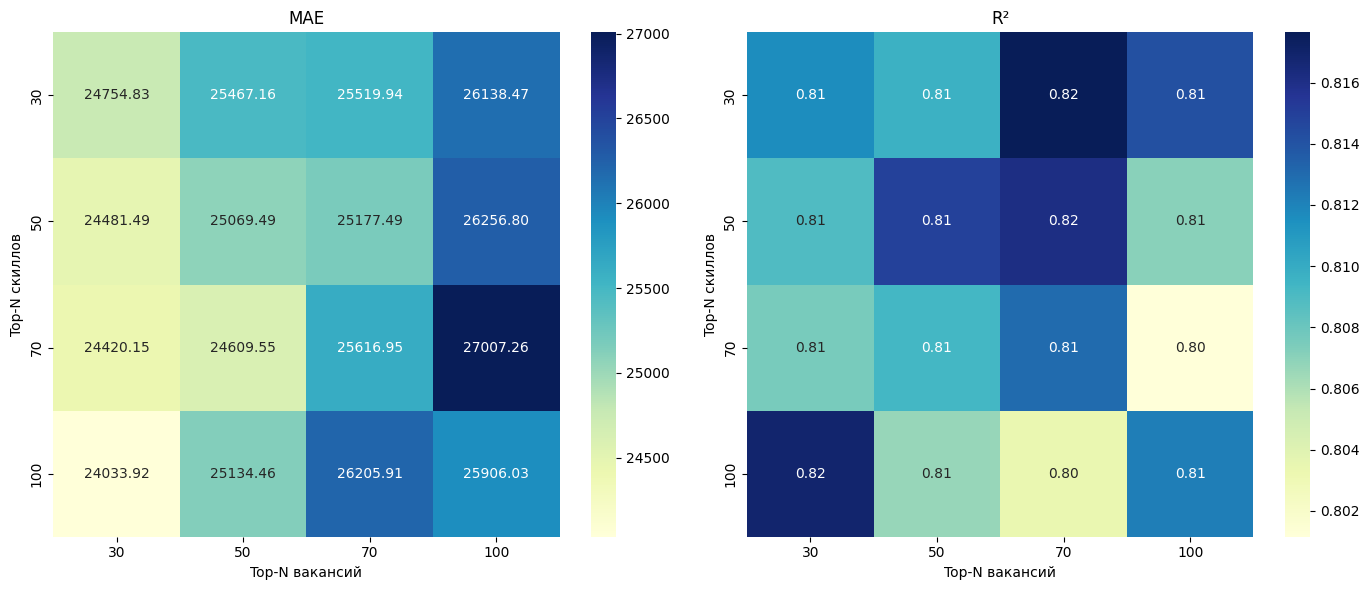

Лучшее сочетание по MAE:
Top Skills: 100.0, Top Vacancies: 30.0, MAE: 24033.92, R²: 0.82, MAPE: 0.23


In [137]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning, message='DataFrameGroupBy.apply operated on the grouping columns.')

# Параметры
top_skills_range = [30,50, 70, 100]
top_vacancies_range = [30, 50,70, 100] 


results = []

for skill_n in tqdm(top_skills_range, desc="Top-N Skills"):
    df_skills_filtered = filtered_skills_top_n(df_train_result.copy(), skill_n)
    #display(df_skills_filtered['skills'])
    # Удаляем строки с пустыми списками skills
    df_skills_filtered = df_skills_filtered[df_skills_filtered['clustered_skills'].apply(lambda x: len(x) > 0)]
    

    def flatten_skills(skills_series):
        all_skills = []
        for skill_list in skills_series:
            if isinstance(skill_list, list):
                all_skills.extend(skill_list)
        return all_skills
    #display(df_skills_filtered['skills'])
    display(f" Взяли {skill_n} скилов . Осталось {df_skills_filtered.shape[0]} cтрок в df. Всего уникальных {len(set(flatten_skills(df_skills_filtered['clustered_skills'])))}" )
    for vac_n in top_vacancies_range:
        # Фильтрация вакансий по top-N внутри позиции
        def filter_top_vacancies(group, n=vac_n):
            vac_counts = group['vacancy_clustered'].value_counts()
            top_vacancies = vac_counts.head(n).index.tolist()
            #top_vacancies = vac_counts.index.tolist()
            return group[group['vacancy_clustered'].isin(top_vacancies)]
        #df_filtered = df_skills_filtered.groupby('position', group_keys=False).apply(filter_top_vacancies, include_groups=False).reset_index(drop=True)
        df_filtered = df_skills_filtered.groupby('position', group_keys=False).apply(filter_top_vacancies).reset_index(drop=True)
        display(f" Взяли {vac_n} вакансий . Осталось {df_filtered.shape[0]} cтрок в df")
        th = 550
        # Удаляем позиции с количеством строк < {th}
        position_counts = df_filtered['position'].value_counts()
        
        valid_positions = position_counts[position_counts >= th].index.tolist() # 200

        df_filtered = df_filtered[df_filtered['position'].isin(valid_positions)]

        display(f"После исключения позиций с < {th} строк осталось {df_filtered.shape[0]} строк и {len(valid_positions)} позиций \n {valid_positions}" )

        
        
        
        # Обработка целевой переменной и признаков
        df_temp = df_filtered.copy()
        
        
        # Очистка целевой переменной от выбросов
        positions_temp = df_temp['position'].dropna().unique()

        for pos in positions_temp:
            pos_mask = df_temp['position'] == pos
            clean_series = process_series(df_temp.loc[pos_mask, 'salary from'], 'salary from', pos)
            if clean_series is not None:
                df_temp.loc[clean_series.index, 'salary from norm'] = clean_series

        # Удалим строки с NaN после очистки
        df_temp = df_temp.dropna(subset=['salary from norm'])
        
        
        if df_temp.empty:
            continue

        # Целевая переменная после очистки
        y = df_temp['salary from norm']
        
                # Определяем порядковое кодирование для experience и level
        experience_order = {
            'Нет опыта': 0,
            '1–3 года': 1,
            '3–6 лет': 2,
            'Более 6 лет': 3,
            'Unknown': -1  # или np.nan для пропусков
        }

        level_order = {
            'Trainee': 0,
            'Junior': 1,
            'Middle': 2,
            'Senior': 3,
            'Lead': 4,
            'Unknown': -1  # или np.nan для пропусков
        }
        
        # Применяем порядковое кодирование
        df_temp['experience_ord'] = df_temp['experience'].map(experience_order)
        df_temp['level_ord'] = df_temp['level'].map(level_order)

        X = df_temp[['experience_ord', 'level_ord', 'schedule', 'employment', 'vacancy_clustered','clustered_skills','region']] # 'vacancy it', 'region',mapped_skills
        #y = df_temp['log_salary']
        #y = df_temp['salary from']

        ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
        mlb = MultiLabelBinarizer()

        try:
            # Кодируем только номинальные категориальные признаки
            X_ohe = ohe.fit_transform(X[['schedule', 'employment','vacancy_clustered', 'region']]) # federal_district
            X_mlb = mlb.fit_transform(X['clustered_skills'])
            
            # Добавляем порядковые признаки
            X_ord = X[['experience_ord', 'level_ord']].values
            
            
        except Exception as e:
            print(f"Ошибка кодирования при skill_n={skill_n}, vac_n={vac_n}: {e}")
            continue

        X_final = np.hstack([X_ord, X_ohe, X_mlb])

        try:
            splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
            for train_idx, test_idx in splitter.split(X_final, df_temp['position']):
                X_train, X_test = X_final[train_idx], X_final[test_idx]
                y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        except ValueError as e:
            print(f"Ошибка split при skill_n={skill_n}, vac_n={vac_n}: {e}")
            continue

        rf_model = RandomForestRegressor(
            n_estimators=500, max_depth=100, random_state=42, n_jobs=-1,
            max_features='sqrt', min_samples_leaf=1, min_samples_split=2
        )

        rf_model.fit(X_train, y_train)
        y_pred = rf_model.predict(X_test)
        
        
        #y_pred = np.expm1(y_pred)
        
        #mae = mean_absolute_error(np.expm1(y_test), y_pred)
        #r2 = r2_score(np.expm1(y_test),  y_pred)
        
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test,  y_pred)
        mape = mean_absolute_percentage_error(y_test, y_pred)
        results.append({
            'top_skills': skill_n,
            'top_vacancies': vac_n,
            'mae': mae,
            'r2': r2,
            'rows': len(df_temp),
            'mape': mape
        })

# Переводим результаты в DataFrame
results_df = pd.DataFrame(results)

# Визуализация результатов
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
pivot_mae = results_df.pivot(index='top_skills', columns='top_vacancies', values='mae')
sns.heatmap(pivot_mae, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('MAE')
plt.xlabel('Top-N вакансий')
plt.ylabel('Top-N скиллов')

plt.subplot(1, 2, 2)
pivot_r2 = results_df.pivot(index='top_skills', columns='top_vacancies', values='r2')
sns.heatmap(pivot_r2, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('R²')
plt.xlabel('Top-N вакансий')
plt.ylabel('Top-N скиллов')

plt.tight_layout()
plt.show()

# Вывод лучшего сочетания
best_row = results_df.sort_values(by='mae').iloc[0]
print(f"Лучшее сочетание по MAE:\nTop Skills: {best_row['top_skills']}, "
      f"Top Vacancies: {best_row['top_vacancies']}, "
      f"MAE: {best_row['mae']:.2f}, R²: {best_row['r2']:.2f}, "
      f"MAPE: {best_row['mape']:.2f}")


Лучшее сочетание по MAE:
Top Skills: 30.0, Top Vacancies: 30.0, MAE: 23179.64, R²: 0.84 !!!!!!!!! region !!!!!!!!!


Лучшее сочетание по MAE:
Top Skills: 30.0, Top Vacancies: 30.0, MAE: 24023.87, R²: 0.82

Лучшее сочетание по MAE:
Top Skills: 30.0, Top Vacancies: 30.0, MAE: 24523.01, R²: 0.82

Лучшее сочетание по MAE:
Top Skills: 50.0, Top Vacancies: 30.0, MAE: 25841.64, R²: 0.80

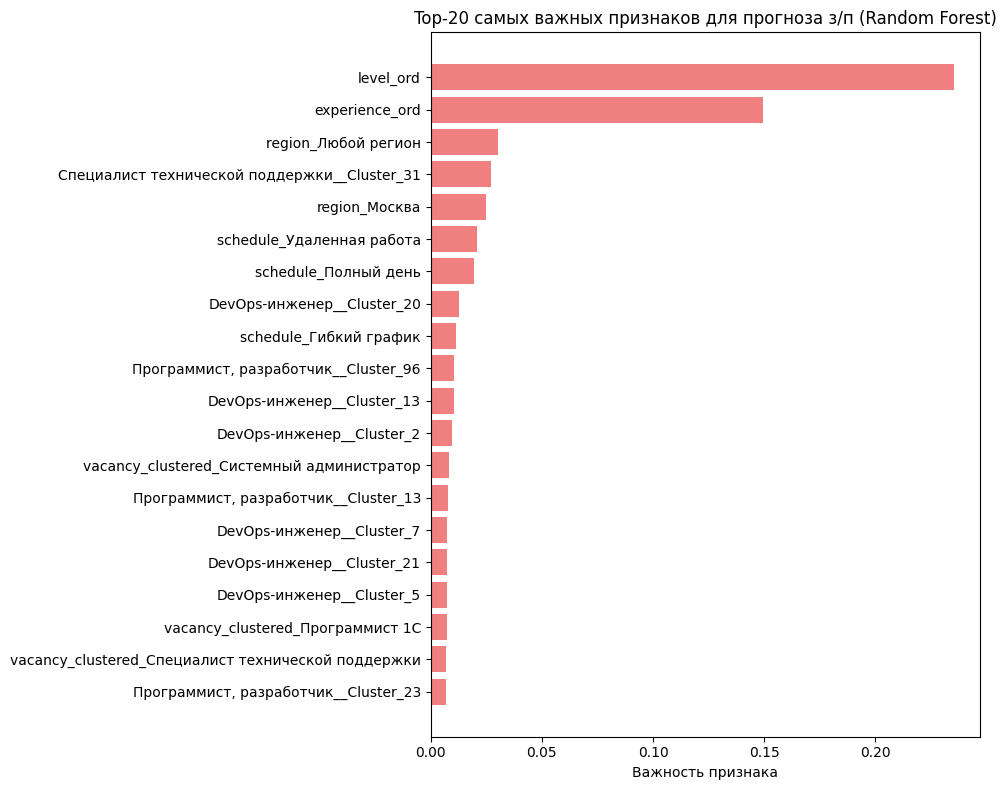

In [138]:
# Получаем важность признаков из обученной модели
feature_importance = rf_model.feature_importances_

# СОЗДАЕМ СПИСОК ИМЕН ПРИЗНАКОВ
# 1. Порядковые признаки
ordinal_features = ['experience_ord', 'level_ord']
    
# 2. OHE признаки (получаем имена из encoder)
ohe_features = ohe.get_feature_names_out(['schedule', 'employment', 'vacancy_clustered', 'region']).tolist()
    
# 3. MLB признаки (получаем имена из binarizer)
mlb_features = mlb.classes_.tolist()
    
# Объединяем все имена признаков
feature_names = ordinal_features + ohe_features + mlb_features

# Сортируем и получаем топ-20


indices = np.argsort(feature_importance)[::-1][:20]
names = [feature_names[i] for i in indices]
scores = [feature_importance[i] for i in indices]

# Создаем горизонтальный bar plot
plt.figure(figsize=(10, 8))
plt.barh(range(len(names)), scores, align='center', color='lightcoral')
plt.yticks(range(len(names)), names)
plt.xlabel('Важность признака')
plt.title('Top-20 самых важных признаков для прогноза з/п (Random Forest)')
plt.gca().invert_yaxis()  # Инвертируем ось Y для лучшей читаемости
plt.tight_layout()
plt.show()

In [139]:
from sklearn.metrics import mean_squared_error, median_absolute_error, mean_absolute_percentage_error

# Создаем список для хранения результатов
results = []

# Получаем уникальные позиции с достаточным количеством данных
position_counts = df_train_result['position'].value_counts()
valid_positions = position_counts[position_counts >= 20].index.tolist()  # Минимум 20 samples

print(f"Всего позиций для анализа: {len(valid_positions)}")

for position_value in valid_positions:
    try:
        # Фильтруем данные для текущей позиции
        df_position = df_train_result[df_train_result['position'] == position_value].copy()
        
        # Определяем порядковое кодирование для experience и level
        experience_order = {
            'Нет опыта': 0,
            '1–3 года': 1,
            '3–6 лет': 2,
            'Более 6 лет': 3,
            'Unknown': -1  # или np.nan для пропусков
        }

        level_order = {
            'Trainee': 0,
            'Junior': 1,
            'Middle': 2,
            'Senior': 3,
            'Lead': 4,
            'Unknown': -1  # или np.nan для пропусков
        }

        # Применяем порядковое кодирование
        df_position['experience_ord'] = df_position['experience'].map(experience_order)
        df_position['level_ord'] = df_position['level'].map(level_order)
        
        if len(df_position) < 20:  # Пропускаем если слишком мало данных
            continue
      
            
        X = df_position[['experience_ord', 'level_ord', 'schedule', 'employment', 'vacancy_clustered', 'region', 'clustered_skills']] # mapped_skills
        y_position = df_position['salary from']

        # Кодирование признаков
        ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
        mlb = MultiLabelBinarizer()

        X_ohe = ohe.fit_transform(X[['schedule', 'employment', 'vacancy_clustered', 'region']])
        X_mlb = mlb.fit_transform(X['clustered_skills']) # mapped_skills
        
        # Добавляем порядковые признаки
        X_ord = X[['experience_ord', 'level_ord']].values
        
        X_final = np.hstack([X_ord, X_ohe, X_mlb])


        # Разделение на train/test
        X_train, X_test, y_train, y_test = train_test_split(
            X_final, 
            y_position.values,
            test_size=0.2, 
            random_state=42
        )

        # Обучение модели
        rf_model = RandomForestRegressor(
            n_estimators=500,  # 
            max_depth=100,
            random_state=42, 
            n_jobs=-1,
            max_features='sqrt'
        )

        rf_model.fit(X_train, y_train)
        y_pred = rf_model.predict(X_test)

        # Расчет метрик
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        
        #mse = mean_squared_error(y_test, y_pred)
        #rmse = np.sqrt(mse)
        
        mape = mean_absolute_percentage_error(y_test, y_pred)
        
                
        # Сохраняем результаты
        results.append({
            'position': position_value,
            'samples': len(df_position),
            'train_samples': len(X_train),
            'test_samples': len(X_test),
            'mae': round(mae, 2),
            'mape': round(mape, 2),
            'r2': round(r2, 4),
            'features_count': X_final.shape[1]
        })
        print(f"Обработана позиция: {position_value} | Samples: {len(df_position)} | MAE: {mae:.2f} | R2: {r2:.4f}")
        
    except Exception as e:
        print(f"Ошибка при обработке позиции {position_value}: {e}")
        continue

# Создаем DataFrame с результатами
results_df = pd.DataFrame(results)

# Сортируем по качеству (лучшие R2 сначала)
results_df = results_df.sort_values('r2', ascending=False).reset_index(drop=True)

# Выводим красивую таблицу
print("\n" + "="*80)
print("РЕЗУЛЬТАТЫ ПО ВСЕМ ПОЗИЦИЯМ")
print("="*80)
print(results_df.to_string(index=False))

# Дополнительная статистика
print("\n" + "="*80)
print("СТАТИСТИКА ПО МОДЕЛЯМ")
print("="*80)
print(f"Всего обработано позиций: {len(results_df)}")
print(f"Средний MAE: {results_df['mae'].mean():.2f}")
print(f"Средний R2: {results_df['r2'].mean():.4f}")
print(f"Лучший R2: {results_df['r2'].max():.4f} ({results_df.loc[results_df['r2'].idxmax(), 'position']})")
print(f"Худший R2: {results_df['r2'].min():.4f} ({results_df.loc[results_df['r2'].idxmin(), 'position']})")

# Сохраняем в файл
results_df.to_csv('position_models_results.csv', index=False, encoding='utf-8-sig')
print(f"\nРезультаты сохранены в файл: position_models_results_6_2.csv")

Всего позиций для анализа: 24
Обработана позиция: Программист, разработчик | Samples: 4633 | MAE: 33563.74 | R2: 0.7123
Обработана позиция: Системный администратор | Samples: 1848 | MAE: 19197.30 | R2: 0.6433
Обработана позиция: Специалист технической поддержки | Samples: 1681 | MAE: 15081.87 | R2: 0.3922
Обработана позиция: Дизайнер, художник | Samples: 1242 | MAE: 15627.91 | R2: 0.6306
Обработана позиция: Тестировщик | Samples: 1119 | MAE: 32115.80 | R2: 0.7371
Обработана позиция: Аналитик | Samples: 985 | MAE: 25144.19 | R2: 0.7507
Обработана позиция: DevOps-инженер | Samples: 655 | MAE: 35558.40 | R2: 0.4906
Обработана позиция: Системный аналитик | Samples: 591 | MAE: 40068.20 | R2: 0.5458
Обработана позиция: Специалист по информационной безопасности | Samples: 540 | MAE: 25454.57 | R2: 0.6749
Обработана позиция: Руководитель проектов | Samples: 524 | MAE: 24939.09 | R2: 0.5906
Обработана позиция: Системный инженер | Samples: 371 | MAE: 30212.48 | R2: 0.7354
Обработана позиция: Биз

In [140]:
results_df.to_excel('data/v4+v5+v6_result/position_models_results_4_5_6(22).xlsx')

In [141]:
len(set(flatten_skills(df_train_result['clustered_skills'])))

1653

In [142]:
стоп

NameError: name 'стоп' is not defined

Top-N Skills:   0%|          | 0/3 [00:00<?, ?it/s]

' Взяли 30 скилов . Осталось 15828 cтрок в df. Всего уникальных 704'

Top-N Skills:  33%|███▎      | 1/3 [00:12<00:25, 12.88s/it]

' Взяли 50 скилов . Осталось 16064 cтрок в df. Всего уникальных 1060'

Top-N Skills:  67%|██████▋   | 2/3 [00:28<00:14, 14.24s/it]

' Взяли 70 скилов . Осталось 16166 cтрок в df. Всего уникальных 1288'

Top-N Skills: 100%|██████████| 3/3 [00:45<00:00, 15.21s/it]


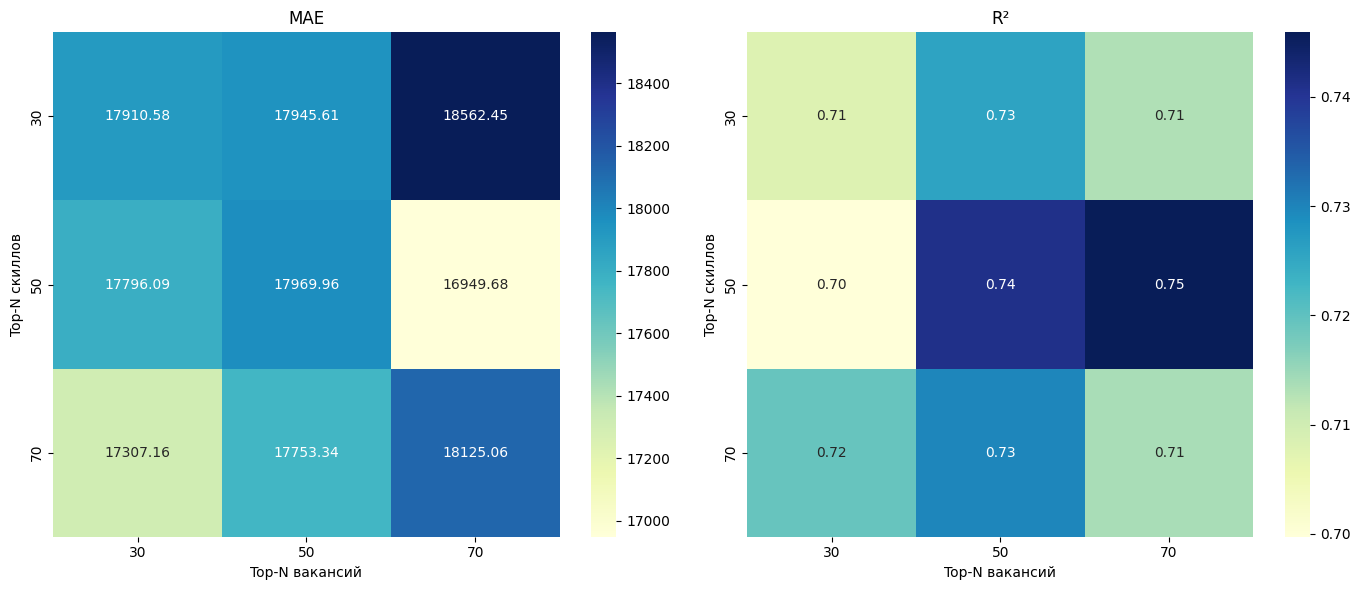

Лучшее сочетание по MAE:
Top Skills: 50.0, Top Vacancies: 70.0, MAE: 16949.68, R²: 0.75, MAPE: 0.22


In [143]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning, message='DataFrameGroupBy.apply operated on the grouping columns.')

# Параметры
top_skills_range = [30,50, 70]
top_vacancies_range = [30, 50,70] 
# Список позиций, которые оставляем
allowed_positions = [
    "Аналитик",
    "Бизнес-аналитик",
    #"Дата-сайентист",
    "Дизайнер, художник",
    #"Программист, разработчик",
    "Продуктовый аналитик",
    "Руководитель проектов",
    "Сетевой инженер",
    "Системный администратор",
    #"Системный аналитик",
    "Специалист по информационной безопасности",
    "Специалист технической поддержки",
    "Технический писатель"
]


results = []

for skill_n in tqdm(top_skills_range, desc="Top-N Skills"):
    
    df_skills_filtered = filtered_skills_top_n(df_train_result.copy(), skill_n)
    #display(df_skills_filtered['skills'])
    # Удаляем строки с пустыми списками skills
    df_skills_filtered = df_skills_filtered[df_skills_filtered['clustered_skills'].apply(lambda x: len(x) > 0)]
    

    def flatten_skills(skills_series):
        all_skills = []
        for skill_list in skills_series:
            if isinstance(skill_list, list):
                all_skills.extend(skill_list)
        return all_skills
    #display(df_skills_filtered['skills'])
    display(f" Взяли {skill_n} скилов . Осталось {df_skills_filtered.shape[0]} cтрок в df. Всего уникальных {len(set(flatten_skills(df_skills_filtered['clustered_skills'])))}" )
    for vac_n in top_vacancies_range:
        # Фильтрация вакансий по top-N внутри позиции
        def filter_top_vacancies(group, n=vac_n):
            vac_counts = group['vacancy_clustered'].value_counts()
            top_vacancies = vac_counts.head(n).index.tolist()
            #top_vacancies = vac_counts.index.tolist()
            return group[group['vacancy_clustered'].isin(top_vacancies)]

        df_filtered = df_skills_filtered.groupby('position', group_keys=False).apply(filter_top_vacancies).reset_index(drop=True)

        
        df_filtered = df_filtered[df_filtered['position'].isin(allowed_positions)]

        
        # Обработка целевой переменной и признаков
        df_temp = df_filtered.copy()
        
        
        # Очистка целевой переменной от выбросов
        positions_temp = df_temp['position'].dropna().unique()

        for pos in positions_temp:
            pos_mask = df_temp['position'] == pos
            clean_series = process_series(df_temp.loc[pos_mask, 'salary from'], 'salary from', pos)
            if clean_series is not None:
                df_temp.loc[clean_series.index, 'salary from norm'] = clean_series

        # Удалим строки с NaN после очистки
        df_temp = df_temp.dropna(subset=['salary from norm'])
        
        
        if df_temp.empty:
            continue

        # Целевая переменная после очистки
        y = df_temp['salary from norm']
        
                # Определяем порядковое кодирование для experience и level
        experience_order = {
            'Нет опыта': 0,
            '1–3 года': 1,
            '3–6 лет': 2,
            'Более 6 лет': 3,
            'Unknown': -1  # или np.nan для пропусков
        }

        level_order = {
            'Trainee': 0,
            'Junior': 1,
            'Middle': 2,
            'Senior': 3,
            'Lead': 4,
            'Chief': 5,
            'Unknown': -1  # или np.nan для пропусков
        }
        
        # Применяем порядковое кодирование
        df_temp['experience_ord'] = df_temp['experience'].map(experience_order)
        df_temp['level_ord'] = df_temp['level'].map(level_order)

        X = df_temp[['experience_ord', 'level_ord', 'schedule', 'employment', 'vacancy_clustered','clustered_skills','region']] # 'vacancy it', 'region',mapped_skills
        #y = df_temp['log_salary']
        #y = df_temp['salary from']

        ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
        mlb = MultiLabelBinarizer()

        try:
            # Кодируем только номинальные категориальные признаки
            X_ohe = ohe.fit_transform(X[['schedule', 'employment','vacancy_clustered', 'region']])
            X_mlb = mlb.fit_transform(X['clustered_skills'])
            
            # Добавляем порядковые признаки
            X_ord = X[['experience_ord', 'level_ord']].values
            
            
        except Exception as e:
            print(f"Ошибка кодирования при skill_n={skill_n}, vac_n={vac_n}: {e}")
            continue

        X_final = np.hstack([X_ord, X_ohe, X_mlb])

        try:
            splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
            for train_idx, test_idx in splitter.split(X_final, df_temp['position']):
                X_train, X_test = X_final[train_idx], X_final[test_idx]
                y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        except ValueError as e:
            print(f"Ошибка split при skill_n={skill_n}, vac_n={vac_n}: {e}")
            continue

        rf_model = RandomForestRegressor(
            n_estimators=500, max_depth=100, random_state=42, n_jobs=-1,
            max_features='sqrt', min_samples_leaf=1, min_samples_split=2
        )

        rf_model.fit(X_train, y_train)
        y_pred = rf_model.predict(X_test)
        
        
        #y_pred = np.expm1(y_pred)
        
        #mae = mean_absolute_error(np.expm1(y_test), y_pred)
        #r2 = r2_score(np.expm1(y_test),  y_pred)
        
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test,  y_pred)
        mape = mean_absolute_percentage_error(y_test,  y_pred)
        results.append({
            'top_skills': skill_n,
            'top_vacancies': vac_n,
            'mae': mae,
            'r2': r2,
            'rows': len(df_temp),
            'mape': mape
        })

# Переводим результаты в DataFrame
results_df = pd.DataFrame(results)

# Визуализация результатов
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
pivot_mae = results_df.pivot(index='top_skills', columns='top_vacancies', values='mae')
sns.heatmap(pivot_mae, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('MAE')
plt.xlabel('Top-N вакансий')
plt.ylabel('Top-N скиллов')

plt.subplot(1, 2, 2)
pivot_r2 = results_df.pivot(index='top_skills', columns='top_vacancies', values='r2')
sns.heatmap(pivot_r2, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('R²')
plt.xlabel('Top-N вакансий')
plt.ylabel('Top-N скиллов')

plt.tight_layout()
plt.show()

# Вывод лучшего сочетания
best_row = results_df.sort_values(by='mae').iloc[0]
print(f"Лучшее сочетание по MAE:\nTop Skills: {best_row['top_skills']}, "
      f"Top Vacancies: {best_row['top_vacancies']}, "
      f"MAE: {best_row['mae']:.2f}, R²: {best_row['r2']:.2f}, "
      f"MAPE: {best_row['mape']:.2f}")

warnings.resetwarnings()


Лучшее сочетание по MAE:
Top Skills: 100.0, Top Vacancies: 30.0, MAE: 16715.62, R²: 0.73 MAPE: 0.23

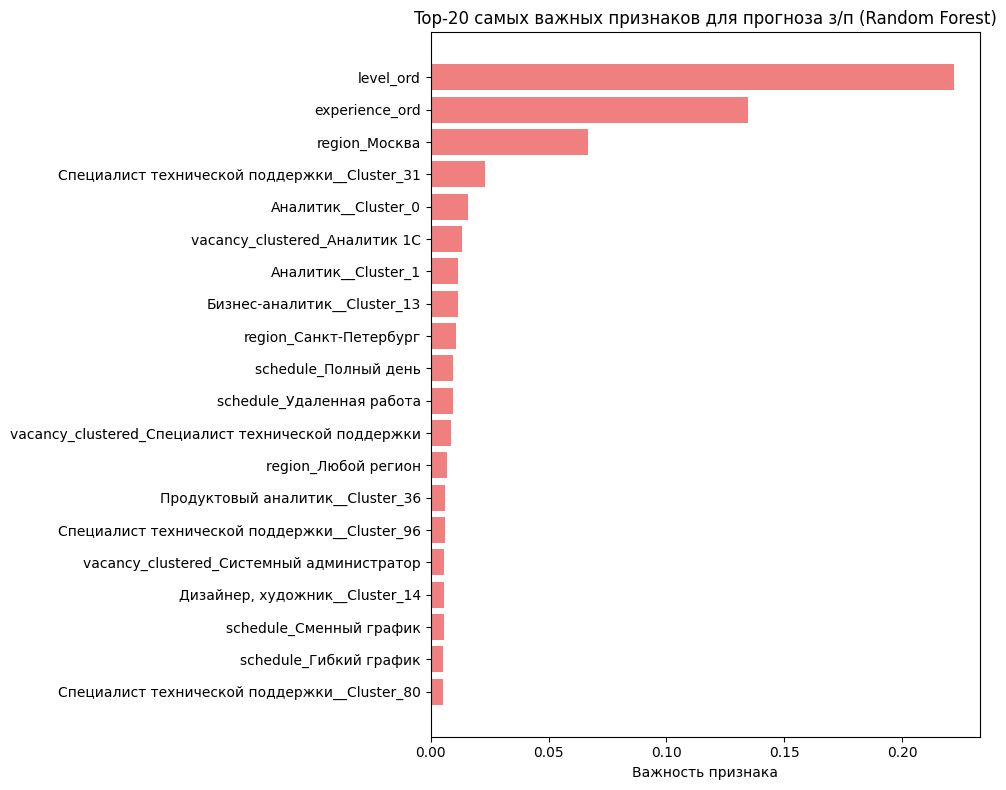

In [144]:
# Получаем важность признаков из обученной модели
feature_importance = rf_model.feature_importances_

# СОЗДАЕМ СПИСОК ИМЕН ПРИЗНАКОВ
# 1. Порядковые признаки
ordinal_features = ['experience_ord', 'level_ord']
    
# 2. OHE признаки (получаем имена из encoder)
ohe_features = ohe.get_feature_names_out(['schedule', 'employment', 'vacancy_clustered', 'region']).tolist()
    
# 3. MLB признаки (получаем имена из binarizer)
mlb_features = mlb.classes_.tolist()
    
# Объединяем все имена признаков
feature_names = ordinal_features + ohe_features + mlb_features

# Сортируем и получаем топ-20


indices = np.argsort(feature_importance)[::-1][:20]
names = [feature_names[i] for i in indices]
scores = [feature_importance[i] for i in indices]

# Создаем горизонтальный bar plot
plt.figure(figsize=(10, 8))
plt.barh(range(len(names)), scores, align='center', color='lightcoral')
plt.yticks(range(len(names)), names)
plt.xlabel('Важность признака')
plt.title('Top-20 самых важных признаков для прогноза з/п (Random Forest)')
plt.gca().invert_yaxis()  # Инвертируем ось Y для лучшей читаемости
plt.tight_layout()
plt.show()

In [ ]:
Продуктовый аналитик 
Дата-сайентист  
Тестировщик  
Аналитик
Технический писатель 
Программист, разработчик
Менеджер продукта 
Системный инженер
Специалист по информационной безопасности
Системный администратор
Сетевой инженер
Бизнес-аналитик
BI-аналитик, аналитик данных
Системный аналитик
Дизайнер, художник
Руководитель проектов
Методолог

Top-N Skills:   0%|          | 0/4 [00:00<?, ?it/s]

' Взяли 30 скилов . Осталось 16881 cтрок в df. Всего уникальных 704'

C:\Users\Андрей\AppData\Local\Temp\ipykernel_5376\2708688604.py:53: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Андрей\AppData\Local\Temp\ipykernel_5376\2708688604.py:53: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Андрей\AppData\Local\Temp\ipykernel_5376\2708688604.py:53: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future versio

' Взяли 50 скилов . Осталось 17189 cтрок в df. Всего уникальных 1048'

C:\Users\Андрей\AppData\Local\Temp\ipykernel_5376\2708688604.py:53: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Андрей\AppData\Local\Temp\ipykernel_5376\2708688604.py:53: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Андрей\AppData\Local\Temp\ipykernel_5376\2708688604.py:53: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future versio

' Взяли 70 скилов . Осталось 17296 cтрок в df. Всего уникальных 1277'

C:\Users\Андрей\AppData\Local\Temp\ipykernel_5376\2708688604.py:53: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Андрей\AppData\Local\Temp\ipykernel_5376\2708688604.py:53: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Андрей\AppData\Local\Temp\ipykernel_5376\2708688604.py:53: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future versio

' Взяли 100 скилов . Осталось 17349 cтрок в df. Всего уникальных 1539'

C:\Users\Андрей\AppData\Local\Temp\ipykernel_5376\2708688604.py:53: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Андрей\AppData\Local\Temp\ipykernel_5376\2708688604.py:53: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Андрей\AppData\Local\Temp\ipykernel_5376\2708688604.py:53: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future versio

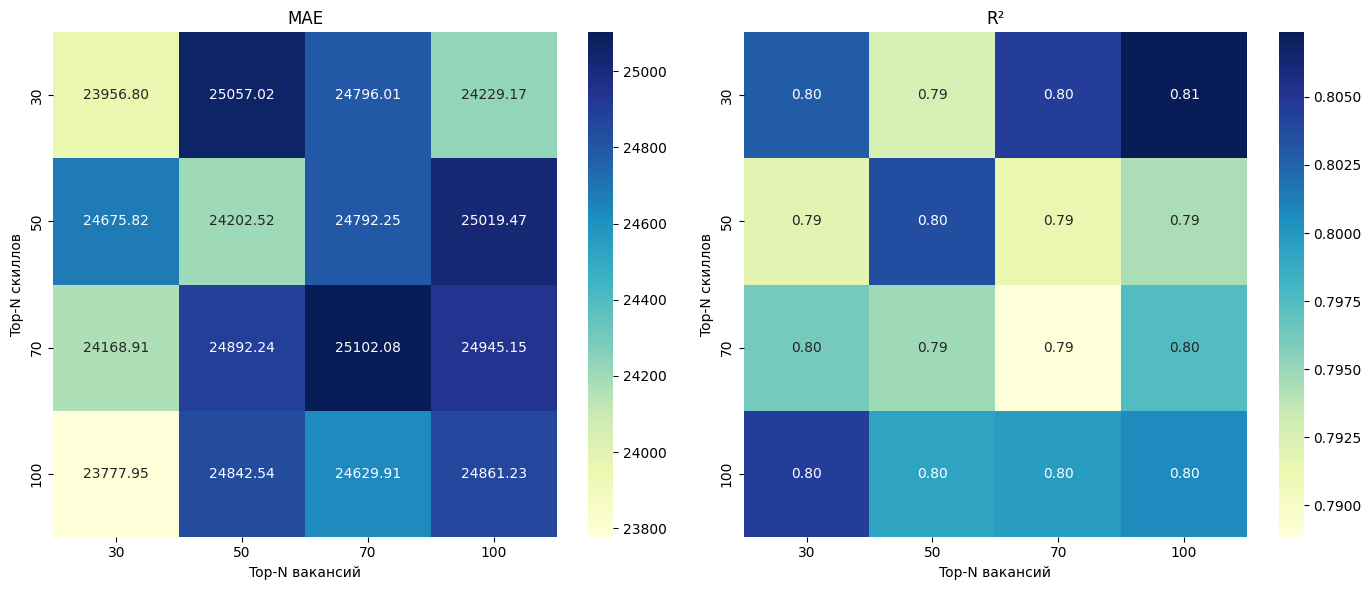

Лучшее сочетание по MAE:
Top Skills: 100.0, Top Vacancies: 30.0, MAE: 23777.95, R²: 0.80


In [ ]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning, message='DataFrameGroupBy.apply operated on the grouping columns.')

# Параметры
top_skills_range = [30,50, 70, 100]
top_vacancies_range = [30, 50,70, 100] 
# Список позиций, которые оставляем
allowed_positions = [
    "Аналитик",
    "Бизнес-аналитик",
    "Дата-сайентист",
    "Дизайнер, художник",
    "Программист, разработчик",
    "Продуктовый аналитик",
    "Руководитель проектов",
    "Сетевой инженер",
    "Системный администратор",
    "Системный аналитик",
    "Специалист по информационной безопасности",
    "Специалист технической поддержки",
    "Технический писатель",
    'Тестировщик',
    'Менеджер продукта',
    'Системный инженер',
    'BI-аналитик, аналитик данных',
    'Методолог'
]


results = []

for skill_n in tqdm(top_skills_range, desc="Top-N Skills"):
    
    df_skills_filtered = filtered_skills_top_n(df_train_result.copy(), skill_n)
    #display(df_skills_filtered['skills'])
    # Удаляем строки с пустыми списками skills
    df_skills_filtered = df_skills_filtered[df_skills_filtered['clustered_skills'].apply(lambda x: len(x) > 0)]
    

    def flatten_skills(skills_series):
        all_skills = []
        for skill_list in skills_series:
            if isinstance(skill_list, list):
                all_skills.extend(skill_list)
        return all_skills
    #display(df_skills_filtered['skills'])
    display(f" Взяли {skill_n} скилов . Осталось {df_skills_filtered.shape[0]} cтрок в df. Всего уникальных {len(set(flatten_skills(df_skills_filtered['clustered_skills'])))}" )
    for vac_n in top_vacancies_range:
        # Фильтрация вакансий по top-N внутри позиции
        def filter_top_vacancies(group, n=vac_n):
            vac_counts = group['vacancy_clustered'].value_counts()
            top_vacancies = vac_counts.head(n).index.tolist()
            #top_vacancies = vac_counts.index.tolist()
            return group[group['vacancy_clustered'].isin(top_vacancies)]

        df_filtered = df_skills_filtered.groupby('position', group_keys=False).apply(filter_top_vacancies).reset_index(drop=True)

        
        df_filtered = df_filtered[df_filtered['position'].isin(allowed_positions)]

        
        # Обработка целевой переменной и признаков
        df_temp = df_filtered.copy()
        
        
        # Очистка целевой переменной от выбросов
        positions_temp = df_temp['position'].dropna().unique()

        for pos in positions_temp:
            pos_mask = df_temp['position'] == pos
            clean_series = process_series(df_temp.loc[pos_mask, 'salary from'], 'salary from', pos)
            if clean_series is not None:
                df_temp.loc[clean_series.index, 'salary from norm'] = clean_series

        # Удалим строки с NaN после очистки
        df_temp = df_temp.dropna(subset=['salary from norm'])
        
        
        if df_temp.empty:
            continue

        # Целевая переменная после очистки
        y = df_temp['salary from norm']
        
                # Определяем порядковое кодирование для experience и level
        experience_order = {
            'Нет опыта': 0,
            '1–3 года': 1,
            '3–6 лет': 2,
            'Более 6 лет': 3,
            'Unknown': -1  # или np.nan для пропусков
        }

        level_order = {
            'Trainee': 0,
            'Junior': 1,
            'Middle': 2,
            'Senior': 3,
            'Lead': 4,
            'Unknown': -1  # или np.nan для пропусков
        }
        
        # Применяем порядковое кодирование
        df_temp['experience_ord'] = df_temp['experience'].map(experience_order)
        df_temp['level_ord'] = df_temp['level'].map(level_order)

        X = df_temp[['experience_ord', 'level_ord', 'schedule', 'employment', 'vacancy_clustered','clustered_skills','region']] # 'vacancy it', 'federal_district',mapped_skills
        #y = df_temp['log_salary']
        #y = df_temp['salary from']

        ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
        mlb = MultiLabelBinarizer()

        try:
            # Кодируем только номинальные категориальные признаки
            X_ohe = ohe.fit_transform(X[['schedule', 'employment','vacancy_clustered', 'region']])
            X_mlb = mlb.fit_transform(X['clustered_skills'])
            
            # Добавляем порядковые признаки
            X_ord = X[['experience_ord', 'level_ord']].values
            
            
        except Exception as e:
            print(f"Ошибка кодирования при skill_n={skill_n}, vac_n={vac_n}: {e}")
            continue

        X_final = np.hstack([X_ord, X_ohe, X_mlb])

        try:
            splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
            for train_idx, test_idx in splitter.split(X_final, df_temp['position']):
                X_train, X_test = X_final[train_idx], X_final[test_idx]
                y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        except ValueError as e:
            print(f"Ошибка split при skill_n={skill_n}, vac_n={vac_n}: {e}")
            continue

        rf_model = RandomForestRegressor(
            n_estimators=500, max_depth=100, random_state=42, n_jobs=-1,
            max_features='sqrt', min_samples_leaf=1, min_samples_split=2
        )

        rf_model.fit(X_train, y_train)
        y_pred = rf_model.predict(X_test)
        
        
        #y_pred = np.expm1(y_pred)
        
        #mae = mean_absolute_error(np.expm1(y_test), y_pred)
        #r2 = r2_score(np.expm1(y_test),  y_pred)
        
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test,  y_pred)

        results.append({
            'top_skills': skill_n,
            'top_vacancies': vac_n,
            'mae': mae,
            'r2': r2,
            'rows': len(df_temp)
        })

# Переводим результаты в DataFrame
results_df = pd.DataFrame(results)

# Визуализация результатов
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
pivot_mae = results_df.pivot(index='top_skills', columns='top_vacancies', values='mae')
sns.heatmap(pivot_mae, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('MAE')
plt.xlabel('Top-N вакансий')
plt.ylabel('Top-N скиллов')

plt.subplot(1, 2, 2)
pivot_r2 = results_df.pivot(index='top_skills', columns='top_vacancies', values='r2')
sns.heatmap(pivot_r2, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('R²')
plt.xlabel('Top-N вакансий')
plt.ylabel('Top-N скиллов')

plt.tight_layout()
plt.show()

# Вывод лучшего сочетания
best_row = results_df.sort_values(by='mae').iloc[0]
print(f"Лучшее сочетание по MAE:\nTop Skills: {best_row['top_skills']}, "
      f"Top Vacancies: {best_row['top_vacancies']}, "
      f"MAE: {best_row['mae']:.2f}, R²: {best_row['r2']:.2f}")


In [ ]:
# Получаем важность признаков из обученной модели
feature_importance = rf_model.feature_importances_

# СОЗДАЕМ СПИСОК ИМЕН ПРИЗНАКОВ
# 1. Порядковые признаки
ordinal_features = ['experience_ord', 'level_ord']
    
# 2. OHE признаки (получаем имена из encoder)
ohe_features = ohe.get_feature_names_out(['schedule', 'employment', 'vacancy_clustered', 'region']).tolist()
    
# 3. MLB признаки (получаем имена из binarizer)
mlb_features = mlb.classes_.tolist()
    
# Объединяем все имена признаков
feature_names = ordinal_features + ohe_features + mlb_features

# Сортируем и получаем топ-20


indices = np.argsort(feature_importance)[::-1][:20]
names = [feature_names[i] for i in indices]
scores = [feature_importance[i] for i in indices]

# Создаем горизонтальный bar plot
plt.figure(figsize=(10, 8))
plt.barh(range(len(names)), scores, align='center', color='lightcoral')
plt.yticks(range(len(names)), names)
plt.xlabel('Важность признака')
plt.title('Top-20 самых важных признаков для прогноза з/п (Random Forest)')
plt.gca().invert_yaxis()  # Инвертируем ось Y для лучшей читаемости
plt.tight_layout()
plt.show()